<a href="https://colab.research.google.com/github/jaiswalgaurav012002/advances_in_ai_project/blob/main/Untitled51.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/english_data.csv'
df = pd.read_csv(file_path, header=None, names=['raw_data'])

# Split 'raw_data' into 'sentence' and 'type_of_speech' based on the last tab character
df[['sentence', 'type_of_speech']] = df['raw_data'].str.rsplit('\t', n=1, expand=True)

# Drop the 'raw_data' column as it’s no longer needed
df = df.drop(columns=['raw_data'])

# Clean up whitespace
df['sentence'] = df['sentence'].str.strip()
df['type_of_speech'] = df['type_of_speech'].astype(str).str.strip().replace('nan', '')

# Further process to clean up any rows where 'type_of_speech' label is embedded within the sentence itself

# Define keywords indicating type_of_speech labels
keywords = ["Hope_speech", "Non_hope_speech"]

# Function to check and correct misaligned labels within the sentence
def extract_label(row):
    for keyword in keywords:
        if keyword in row['sentence']:
            row['type_of_speech'] = keyword
            row['sentence'] = row['sentence'].replace(f"\t{keyword}", "").strip()
    return row

# Apply the function to clean up misaligned labels
df = df.apply(extract_label, axis=1)

# Display the first few rows to verify the cleaned data
print(df.head(10))

# Optionally save the cleaned dataset to a new CSV file
output_path = '/content/modified_english_data.csv'
df.to_csv(output_path, index=False)


                                            sentence   type_of_speech
0  these tiktoks radiate gay chaotic energy and i...  Non_hope_speech
1  @Champions Again He got killed for using false...  Non_hope_speech
2               It's not that all lives don't matter  Non_hope_speech
3  Is it really that difficult to understand? Bla...  Non_hope_speech
4  Whenever we say black isn't that racists?  Why...  Non_hope_speech
5  Ros The Boss u don’t know that she’s actually ...  Non_hope_speech
6  That was funny at the end when Larry said 'Wha...  Non_hope_speech
7                    She saves lives with her music.  Non_hope_speech
8        There were a lot of Samoans in my Army unit  Non_hope_speech
9  Network Engineer here- 23 and currently workin...      Hope_speech


In [ ]:
import re

# Basic exploratory data analysis

# Size and shape of the dataset
data_shape = df.shape
num_data_points = len(df)

# Function to clean text and count unique words
def count_distinct_words(text_series):
    # Join all text data into one large string
    all_text = ' '.join(text_series)
    # Remove special characters and punctuation using regex, then split into words
    words = re.findall(r'\b\w+\b', all_text.lower())
    # Return the number of unique words
    return len(set(words))

# Count number of distinct words in the 'sentence' column
num_distinct_words = count_distinct_words(df['sentence'])

# Display the results
data_shape, num_data_points, num_distinct_words


((22762, 2), 22762, 19016)

Shape of the dataset: (22762, 2) — 22,762 rows and 2 columns.
Number of data points: 22,762
Number of distinct words (excluding special characters and punctuation): 19,016:

In [ ]:
import pandas as pd
import re
import os

# Load the dataset
file_path = '/content/english_hope_train.csv'  # Change this path if your file is in a different location
df = pd.read_csv(file_path, header=None, names=['raw_data'])

# Split 'raw_data' into 'sentence' and 'type_of_speech' based on the last tab character
df[['sentence', 'type_of_speech']] = df['raw_data'].str.rsplit('\t', n=1, expand=True)

# Drop the 'raw_data' column as it’s no longer needed
df = df.drop(columns=['raw_data'])

# Clean up whitespace
df['sentence'] = df['sentence'].str.strip()
df['type_of_speech'] = df['type_of_speech'].astype(str).str.strip().replace('nan', '')

# Further process to clean up any rows where 'type_of_speech' label is embedded within the sentence itself

# Define keywords indicating type_of_speech labels
keywords = ["Hope_speech", "Non_hope_speech"]

# Function to check and correct misaligned labels within the sentence
def extract_label(row):
    for keyword in keywords:
        if keyword in row['sentence']:
            row['type_of_speech'] = keyword
            row['sentence'] = row['sentence'].replace(f"\t{keyword}", "").strip()
    return row

# Apply the function to clean up misaligned labels
df = df.apply(extract_label, axis=1)

# Function to remove special characters but keep punctuation
def remove_special_characters(text):
    # Remove all characters that are not letters, numbers, spaces, or punctuation
    return re.sub(r'[^A-Za-z0-9\s.,!?\'"-]', '', text)

# Apply the function to the 'sentence' column
df['sentence'] = df['sentence'].apply(remove_special_characters)

# Ensure the '/content' directory exists in Google Colab or create the directory if running locally
os.makedirs('/content', exist_ok=True)

# Save the modified dataset to a new CSV file
output_path = '/content/cleaned_english_data.csv'
df.to_csv(output_path, index=False)

# Print the location of the saved file
print(f"Modified dataset saved to {output_path}")


Modified dataset saved to /content/cleaned_english_data.csv


In [ ]:
!pip install langdetect


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 39.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=3ee539ea087692fba031c94146b6d00155f54c0043db0e0ca43c0b7510e067ec
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
import pandas as pd
import re
from langdetect import detect, DetectorFactory

DetectorFactory.seed = 0  # Ensures consistent results in language detection

# Load the dataset
file_path = '/content/english_data.csv'
df = pd.read_csv(file_path, header=None, names=['raw_data'])

# Split 'raw_data' into 'sentence' and 'type_of_speech' based on the last tab character
df[['sentence', 'type_of_speech']] = df['raw_data'].str.rsplit('\t', n=1, expand=True)
df = df.drop(columns=['raw_data'])

# Clean up whitespace
df['sentence'] = df['sentence'].str.strip()
df['type_of_speech'] = df['type_of_speech'].astype(str).str.strip().replace('nan', '')

# Correct misaligned labels within the sentence
keywords = ["Hope_speech", "Non_hope_speech"]
def extract_label(row):
    for keyword in keywords:
        if keyword in row['sentence']:
            row['type_of_speech'] = keyword
            row['sentence'] = row['sentence'].replace(f"\t{keyword}", "").strip()
    return row
df = df.apply(extract_label, axis=1)

# Remove special characters but keep punctuation
def remove_special_characters(text):
    return re.sub(r'[^A-Za-z0-9\s.,!?\'"-]', '', text)
df['sentence'] = df['sentence'].apply(remove_special_characters)

# Detect and filter out non-English sentences
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False
df = df[df['sentence'].apply(is_english)]

# Save the cleaned dataset
output_path = '/content/cleaned_english_data_english_only.csv'
df.to_csv(output_path, index=False)

print(f"Modified dataset saved to {output_path}")


Modified dataset saved to /content/cleaned_english_data_english_only.csv


In [ ]:
# Checking the number of words and dimensions of the cleaned dataset

# Dataset dimensions
dataset_shape = df.shape

# Function to count words in the 'sentence' column
def count_words(text_series):
    return text_series.str.split().str.len().sum()

# Total number of words in the 'sentence' column
total_words = count_words(df['sentence'])

dataset_shape, total_words


((22562, 2), 367663)

Modified dataset saved to /content/cleaned_english_data_english_only.csv
Dataset dimensions: (22562, 2)

Distribution of type_of_speech:
 type_of_speech
Non_hope_speech    20581
Hope_speech         1960
                      21
Name: count, dtype: int64

Word Count Statistics:
 {'Min Word Count': 2, 'Max Word Count': 197, 'Mean Word Count': 16.295674142363264, 'Median Word Count': 11.0}

Character Count Statistics:
 {'Min Char Count': 5, 'Max Char Count': 1077, 'Mean Char Count': 88.80613420796028, 'Median Char Count': 61.0}


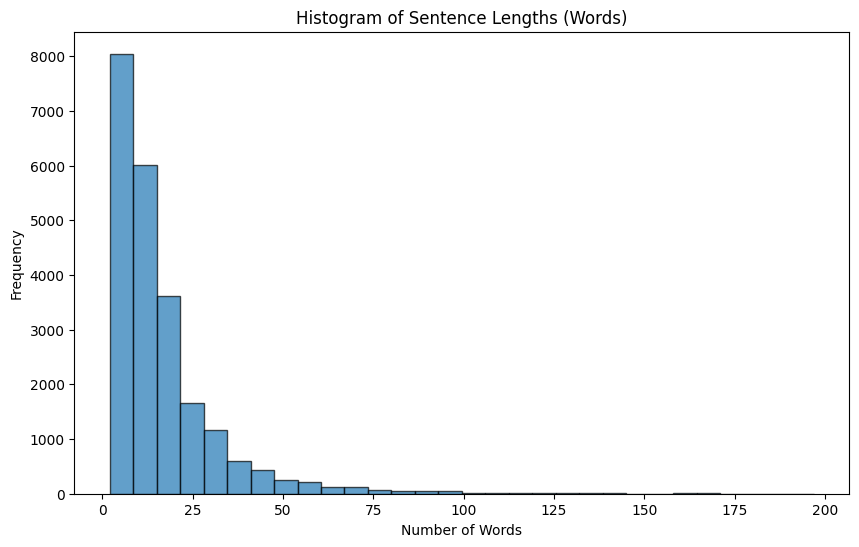

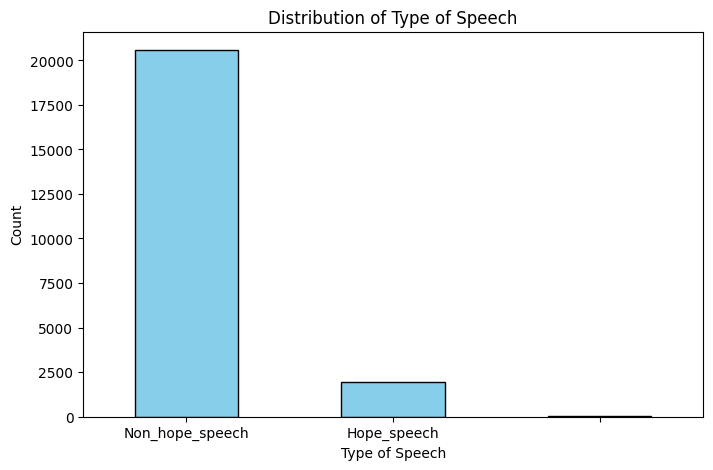

In [ ]:
import pandas as pd
import re
from langdetect import detect, DetectorFactory
import os

# Ensure consistent language detection results
DetectorFactory.seed = 0

# Step 1: Load the original dataset
file_path = '/content/english_data.csv'  # Replace this path if needed
df = pd.read_csv(file_path, header=None, names=['raw_data'])

# Step 2: Split 'raw_data' into 'sentence' and 'type_of_speech' based on the last tab character
df[['sentence', 'type_of_speech']] = df['raw_data'].str.rsplit('\t', n=1, expand=True)
df = df.drop(columns=['raw_data'])

# Step 3: Clean up whitespace and misaligned labels
df['sentence'] = df['sentence'].str.strip()
df['type_of_speech'] = df['type_of_speech'].astype(str).str.strip().replace('nan', '')

# Define keywords indicating 'type_of_speech' labels
keywords = ["Hope_speech", "Non_hope_speech"]

# Function to check and correct misaligned labels within the sentence
def extract_label(row):
    for keyword in keywords:
        if keyword in row['sentence']:
            row['type_of_speech'] = keyword
            row['sentence'] = row['sentence'].replace(f"\t{keyword}", "").strip()
    return row

df = df.apply(extract_label, axis=1)

# Step 4: Remove special characters but keep punctuation
def remove_special_characters(text):
    return re.sub(r'[^A-Za-z0-9\s.,!?\'"-]', '', text)

df['sentence'] = df['sentence'].apply(remove_special_characters)

# Step 5: Filter out non-English sentences
def is_english(text):
    try:
        return detect(text) == 'en'
    except:
        return False

df = df[df['sentence'].apply(is_english)]

# Step 6: Save the cleaned dataset
output_path = '/content/cleaned_english_data_english_only.csv'
os.makedirs('/content', exist_ok=True)
df.to_csv(output_path, index=False)
print(f"Modified dataset saved to {output_path}")

# Step 7: Basic Exploratory Data Analysis (EDA)

# Dataset dimensions
dataset_shape = df.shape
print("Dataset dimensions:", dataset_shape)

# Count number of instances for each type_of_speech
speech_type_distribution = df['type_of_speech'].value_counts()
print("\nDistribution of type_of_speech:\n", speech_type_distribution)

# Calculate word and character count statistics
df['word_count'] = df['sentence'].str.split().str.len()
df['char_count'] = df['sentence'].str.len()

# Word count statistics
word_count_stats = {
    "Min Word Count": df['word_count'].min(),
    "Max Word Count": df['word_count'].max(),
    "Mean Word Count": df['word_count'].mean(),
    "Median Word Count": df['word_count'].median()
}
print("\nWord Count Statistics:\n", word_count_stats)

# Character count statistics
char_count_stats = {
    "Min Char Count": df['char_count'].min(),
    "Max Char Count": df['char_count'].max(),
    "Mean Char Count": df['char_count'].mean(),
    "Median Char Count": df['char_count'].median()
}
print("\nCharacter Count Statistics:\n", char_count_stats)

# Step 8: Visualizations (optional)
import matplotlib.pyplot as plt

# Histogram of sentence lengths (in words)
plt.figure(figsize=(10, 6))
plt.hist(df['word_count'], bins=30, edgecolor='k', alpha=0.7)
plt.title("Histogram of Sentence Lengths (Words)")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()

# Bar chart for distribution of type_of_speech
plt.figure(figsize=(8, 5))
speech_type_distribution.plot(kind='bar', color='skyblue', edgecolor='k')
plt.title("Distribution of Type of Speech")
plt.xlabel("Type of Speech")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()


In [ ]:
!pip install textstat


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.1/105.1 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 86.2 MB/s eta 0:00:00


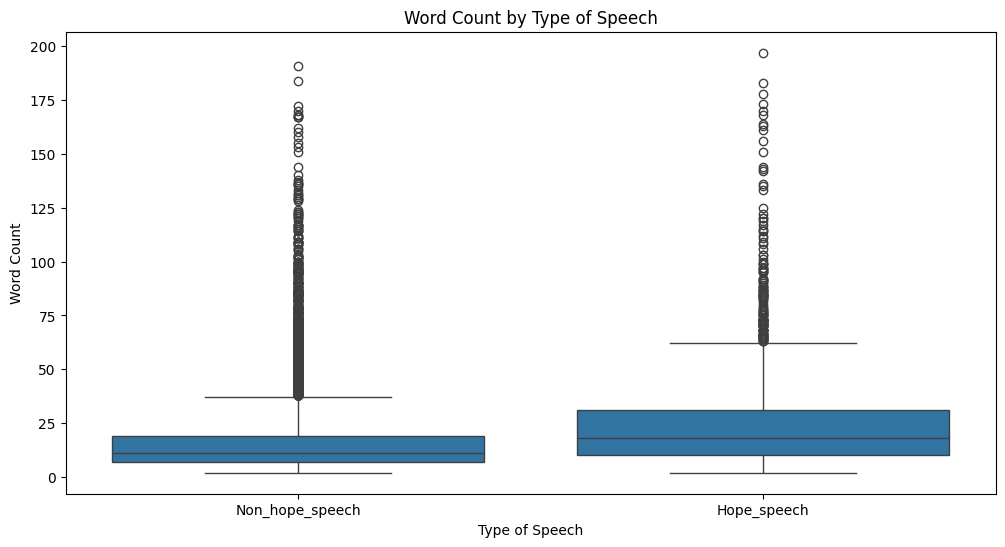

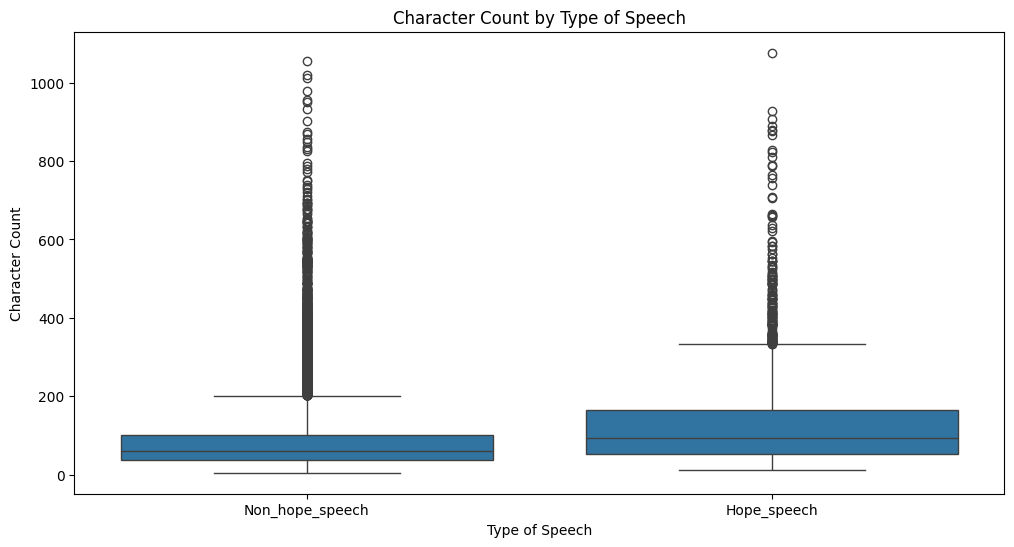

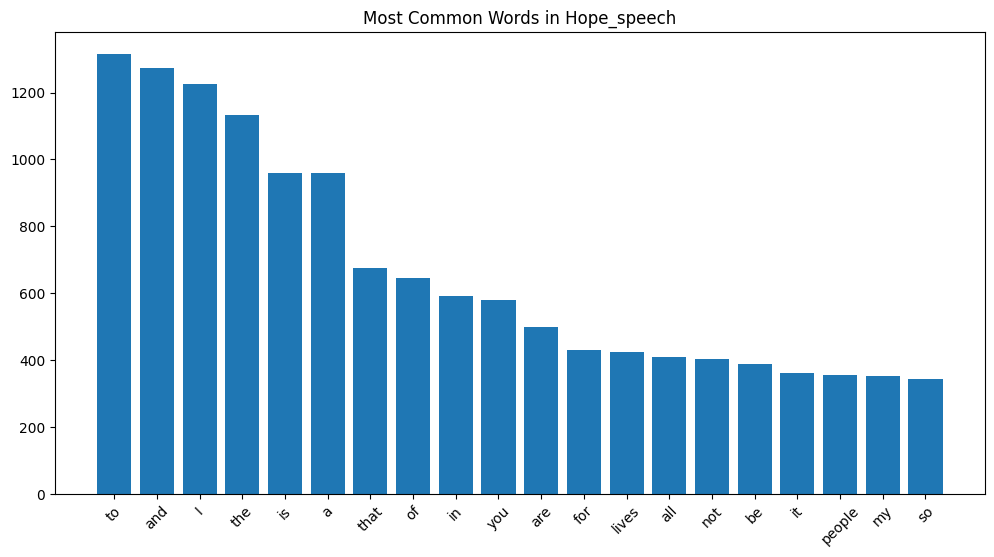

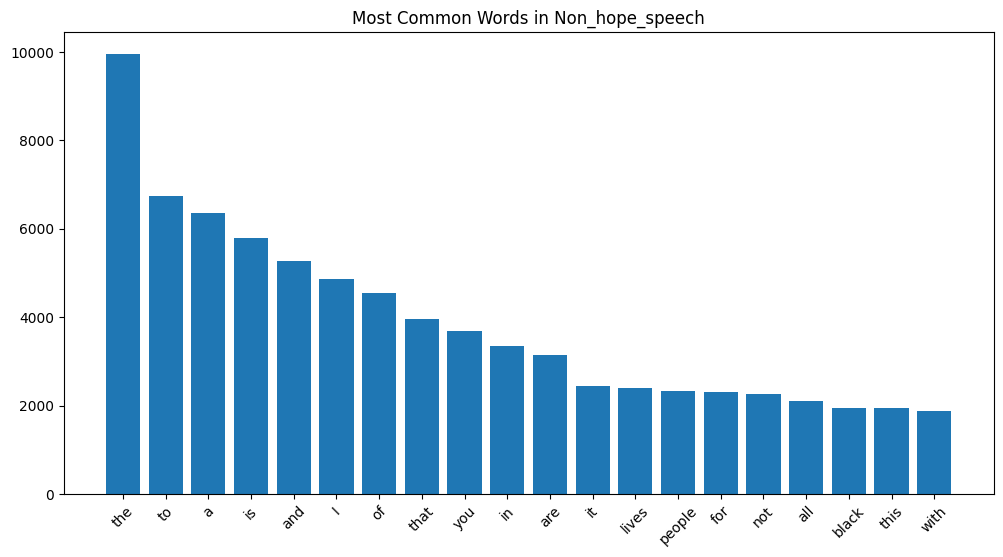

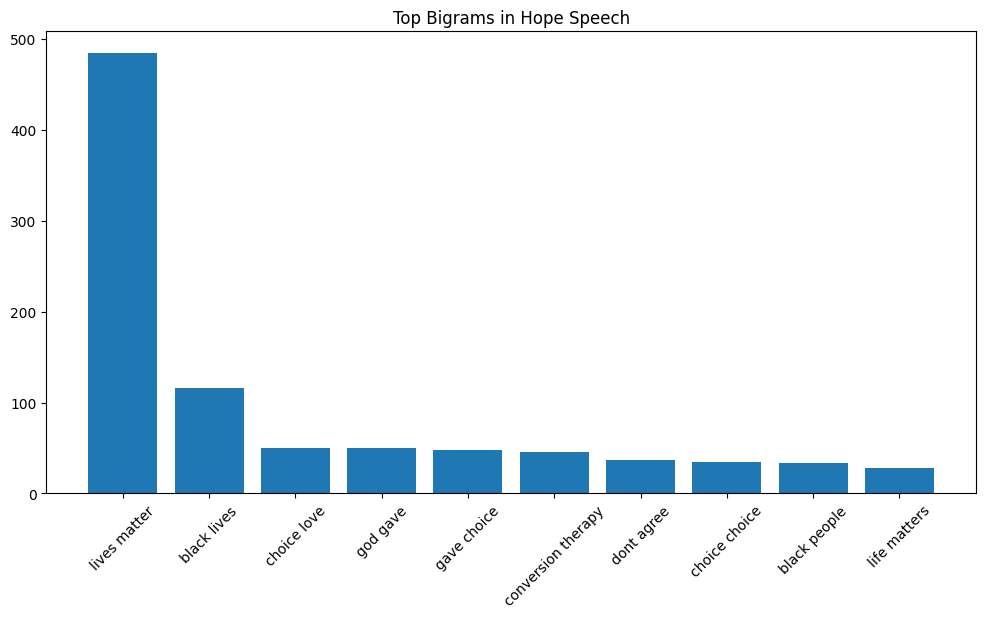

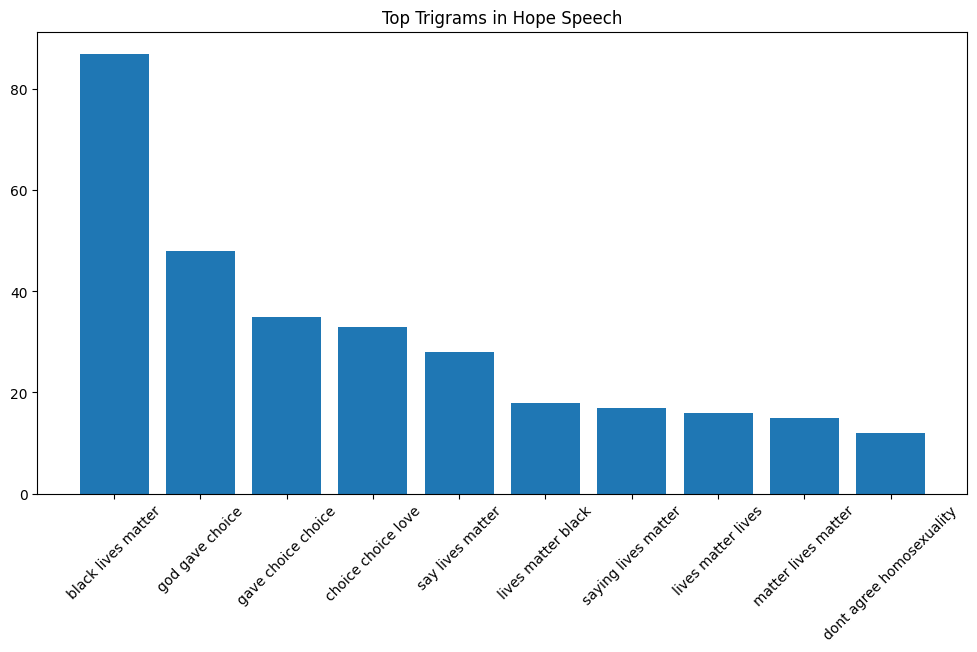

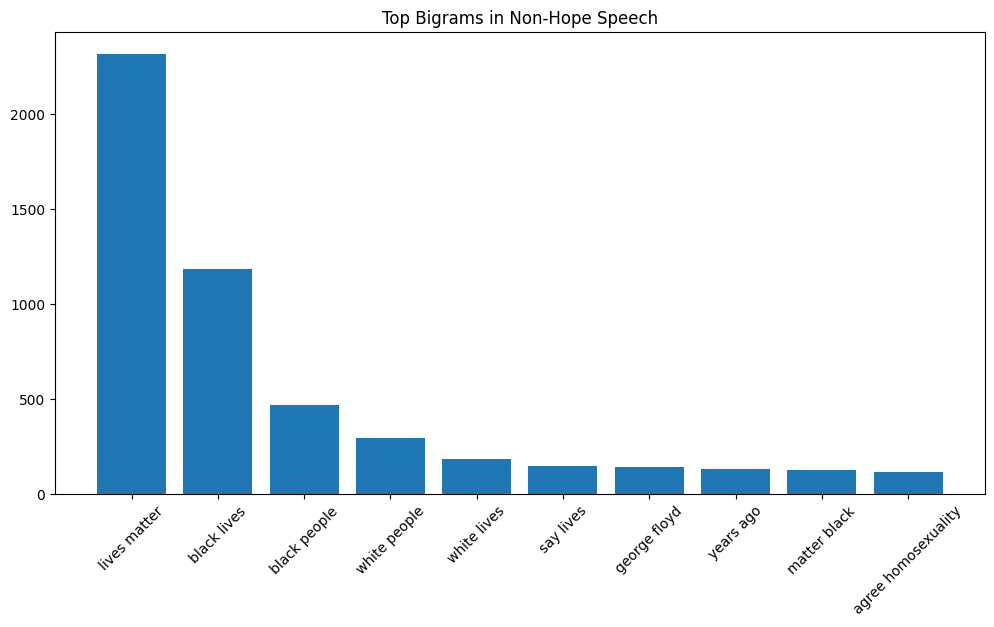

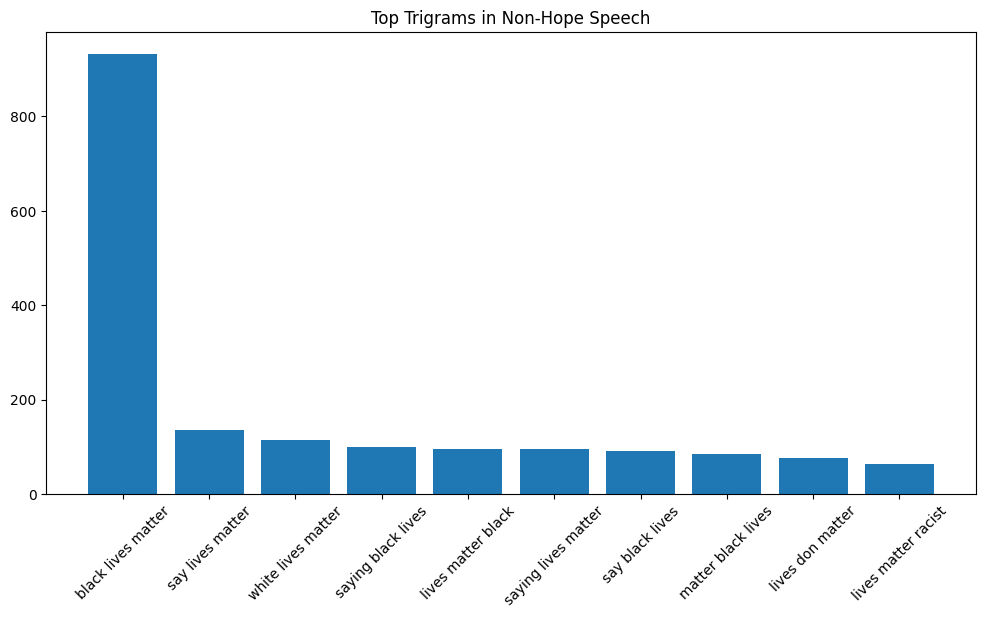

<ipython-input-9-9e0ddc956df6>:73: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='type_of_speech', y='sentiment', ci=None)


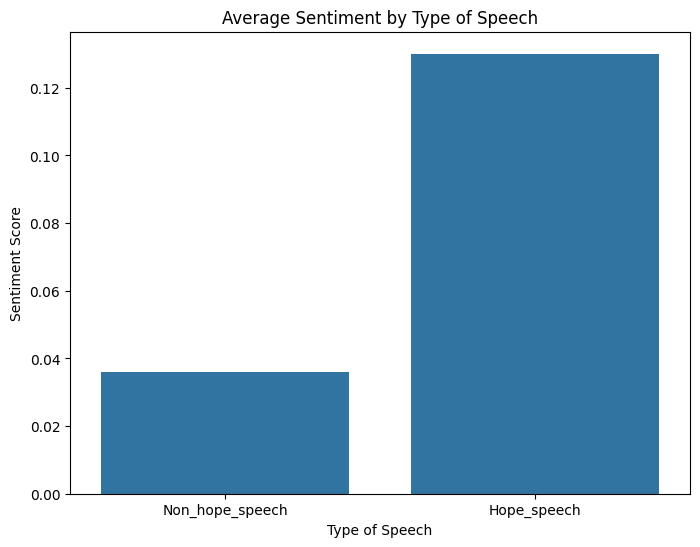

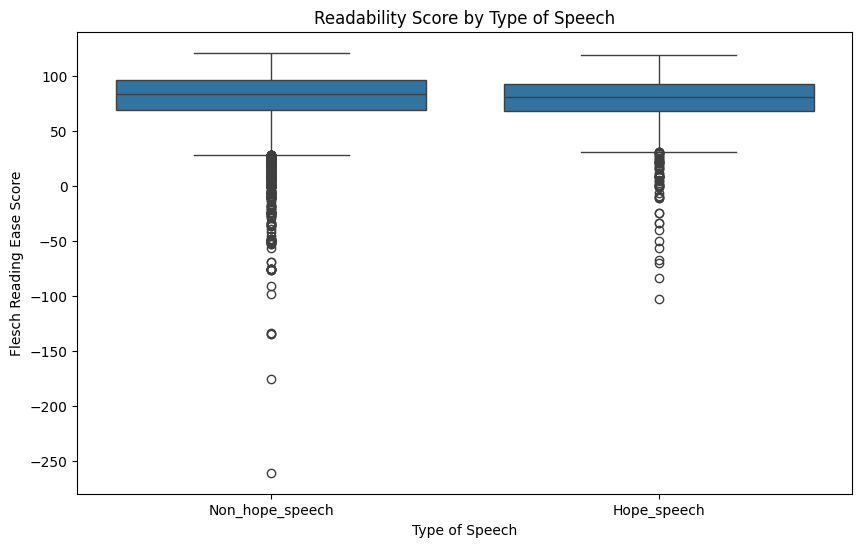

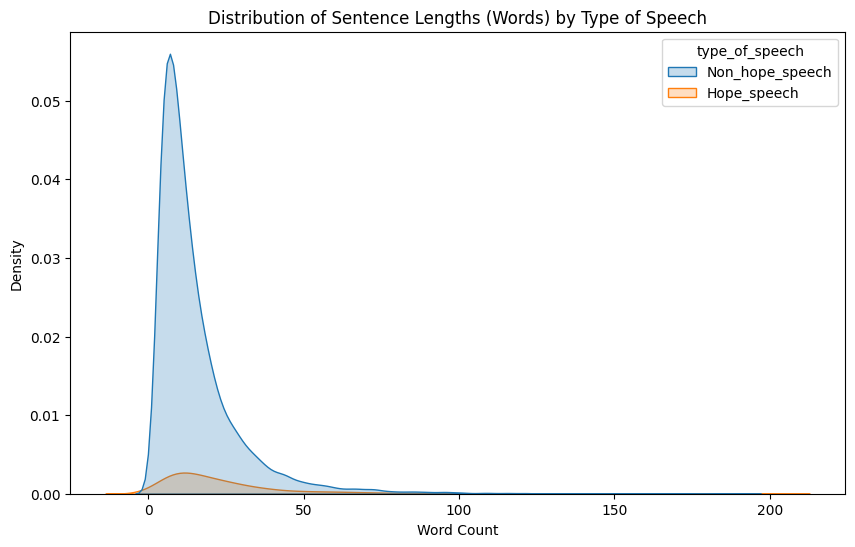

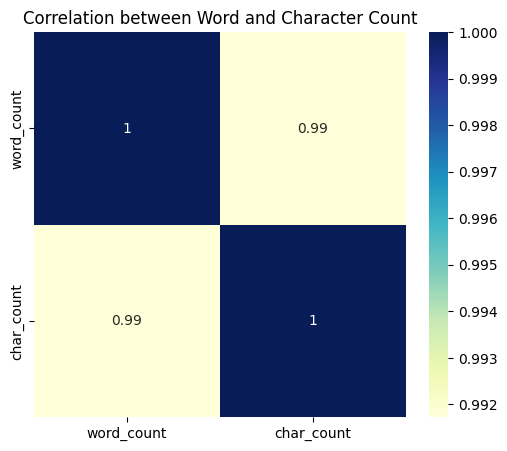

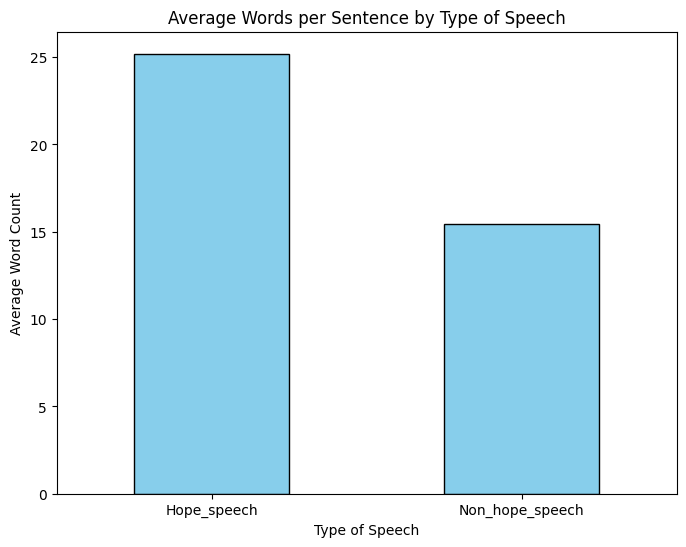

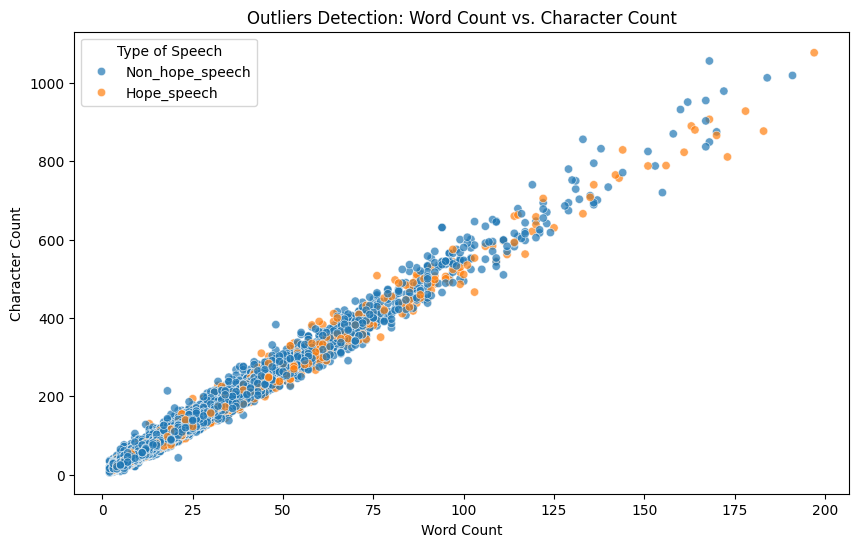

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from textstat import flesch_reading_ease
import numpy as np

# Load the dataset
file_path = '/content/cleaned_english_data_english_only.csv'
df = pd.read_csv(file_path)

# Ensure columns for analysis
df['word_count'] = df['sentence'].str.split().str.len()
df['char_count'] = df['sentence'].str.len()

# Analysis and Visualization

# 1. Sentence Length Analysis by Type of Speech
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='type_of_speech', y='word_count')
plt.title("Word Count by Type of Speech")
plt.xlabel("Type of Speech")
plt.ylabel("Word Count")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='type_of_speech', y='char_count')
plt.title("Character Count by Type of Speech")
plt.xlabel("Type of Speech")
plt.ylabel("Character Count")
plt.show()

# 2. Most Common Words by Type of Speech
def plot_most_common_words(data, type_of_speech):
    text = " ".join(data[data['type_of_speech'] == type_of_speech]['sentence'])
    word_counts = Counter(text.split())
    common_words = dict(word_counts.most_common(20))

    plt.figure(figsize=(12, 6))
    plt.bar(common_words.keys(), common_words.values())
    plt.title(f"Most Common Words in {type_of_speech}")
    plt.xticks(rotation=45)
    plt.show()

plot_most_common_words(df, 'Hope_speech')
plot_most_common_words(df, 'Non_hope_speech')

# 3. Bigrams and Trigrams Analysis
def plot_top_ngrams(data, ngram_range, title):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    ngrams = vectorizer.fit_transform(data['sentence'])
    ngram_counts = Counter(dict(zip(vectorizer.get_feature_names_out(), ngrams.sum(axis=0).A1)))
    top_ngrams = dict(ngram_counts.most_common(10))

    plt.figure(figsize=(12, 6))
    plt.bar(top_ngrams.keys(), top_ngrams.values())
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

plot_top_ngrams(df[df['type_of_speech'] == 'Hope_speech'], (2, 2), "Top Bigrams in Hope Speech")
plot_top_ngrams(df[df['type_of_speech'] == 'Hope_speech'], (3, 3), "Top Trigrams in Hope Speech")

plot_top_ngrams(df[df['type_of_speech'] == 'Non_hope_speech'], (2, 2), "Top Bigrams in Non-Hope Speech")
plot_top_ngrams(df[df['type_of_speech'] == 'Non_hope_speech'], (3, 3), "Top Trigrams in Non-Hope Speech")

# 4. Sentence Polarity (Sentiment Analysis)
df['sentiment'] = df['sentence'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='type_of_speech', y='sentiment', ci=None)
plt.title("Average Sentiment by Type of Speech")
plt.xlabel("Type of Speech")
plt.ylabel("Sentiment Score")
plt.show()

# 5. Readability Scores Analysis
df['readability_score'] = df['sentence'].apply(flesch_reading_ease)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='type_of_speech', y='readability_score')
plt.title("Readability Score by Type of Speech")
plt.xlabel("Type of Speech")
plt.ylabel("Flesch Reading Ease Score")
plt.show()

# 6. Type of Speech Distribution over Sentence Lengths
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='word_count', hue='type_of_speech', fill=True)
plt.title("Distribution of Sentence Lengths (Words) by Type of Speech")
plt.xlabel("Word Count")
plt.ylabel("Density")
plt.show()

# 7. Heatmap of Character and Word Count Correlation
correlation = df[['word_count', 'char_count']].corr()
plt.figure(figsize=(6, 5))
sns.heatmap(correlation, annot=True, cmap="YlGnBu")
plt.title("Correlation between Word and Character Count")
plt.show()

# 8. Average Words per Sentence by Type of Speech
avg_word_count = df.groupby('type_of_speech')['word_count'].mean()
plt.figure(figsize=(8, 6))
avg_word_count.plot(kind='bar', color='skyblue', edgecolor='k')
plt.title("Average Words per Sentence by Type of Speech")
plt.xlabel("Type of Speech")
plt.ylabel("Average Word Count")
plt.xticks(rotation=0)
plt.show()

# 9. Outlier Detection
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='word_count', y='char_count', hue='type_of_speech', alpha=0.7)
plt.title("Outliers Detection: Word Count vs. Character Count")
plt.xlabel("Word Count")
plt.ylabel("Character Count")
plt.legend(title="Type of Speech")
plt.show()

# 10. Time-based or Sequential Analysis (if timestamp column is available)
# Uncomment the following lines if you have a 'timestamp' column in your dataset
# df['date'] = pd.to_datetime(df['timestamp']).dt.date
# speech_over_time = df.groupby(['date', 'type_of_speech']).size().unstack().fillna(0)
# plt.figure(figsize=(12, 6))
# speech_over_time.plot()
# plt.title("Frequency of Type of Speech Over Time")
# plt.xlabel("Date")
# plt.ylabel("Frequency")
# plt.legend(title="Type of Speech")
# plt.show()


In [ ]:
import pandas as pd
import random
import nltk
from nltk.corpus import wordnet
from tqdm import tqdm

# Download necessary NLTK data
nltk.download('wordnet')
nltk.download('omw-1.4')

# Load the dataset
file_path = '/content/cleaned_english_data_english_only.csv'
df = pd.read_csv(file_path)

# Check distribution
print("Original Distribution of type_of_speech:\n", df['type_of_speech'].value_counts())

# Define a function for synonym replacement
def synonym_replacement(sentence, n=1):
    words = sentence.split()
    new_words = words.copy()
    random_word_list = list(set([word for word in words if wordnet.synsets(word)]))
    random.shuffle(random_word_list)

    num_replaced = 0
    for random_word in random_word_list:
        synonyms = wordnet.synsets(random_word)
        if synonyms:
            synonym = synonyms[0].lemmas()[0].name()
            new_words = [synonym if word == random_word else word for word in new_words]
            num_replaced += 1
        if num_replaced >= n:
            break

    return ' '.join(new_words)

# Apply augmentation only on 'Hope_speech' samples
augmented_sentences = []
target_class = 'Hope_speech'
n_augmentations = 5  # Number of augmentations per sentence

# Iterate over each 'Hope_speech' sentence and generate augmented sentences
for sentence in tqdm(df[df['type_of_speech'] == target_class]['sentence']):
    for _ in range(n_augmentations):
        augmented_sentence = synonym_replacement(sentence, n=2)
        augmented_sentences.append([augmented_sentence, target_class])

# Convert augmented data to a DataFrame
augmented_df = pd.DataFrame(augmented_sentences, columns=['sentence', 'type_of_speech'])

# Concatenate the original dataset with the augmented data
balanced_df = pd.concat([df, augmented_df])

# Check new distribution
print("\nNew Distribution of type_of_speech after augmentation:\n", balanced_df['type_of_speech'].value_counts())

# Save the balanced dataset
output_path = '/content/balanced_english_data_with_augmentation.csv'
balanced_df.to_csv(output_path, index=False)
print(f"\nBalanced dataset saved to {output_path}")


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


Original Distribution of type_of_speech:
 type_of_speech
Non_hope_speech    20581
Hope_speech         1960
Name: count, dtype: int64


100%|██████████| 1960/1960 [00:07<00:00, 264.47it/s]



New Distribution of type_of_speech after augmentation:
 type_of_speech
Non_hope_speech    20581
Hope_speech        11760
Name: count, dtype: int64

Balanced dataset saved to /content/balanced_english_data_with_augmentation.csv


In [ ]:
# Load the original dataset
file_path = '/content/cleaned_english_data_english_only.csv'
df = pd.read_csv(file_path)

# Define augmentation parameters
target_class = 'Hope_speech'
n_augmentations = 3  # Number of new augmentations per sentence

# Filter the original Hope_speech samples
original_hope_speech_df = df[df['type_of_speech'] == target_class]

# Create additional augmented sentences for only the original Hope_speech samples
additional_augmented_sentences = []

# Generate augmentations only on original "Hope_speech" sentences
for sentence in tqdm(original_hope_speech_df['sentence']):
    for _ in range(n_augmentations):
        augmented_sentence = synonym_replacement(sentence, n=2)
        additional_augmented_sentences.append([augmented_sentence, target_class])

# Convert additional augmented data to a DataFrame
additional_augmented_df = pd.DataFrame(additional_augmented_sentences, columns=['sentence', 'type_of_speech'])

# Load the previously balanced dataset and concatenate only the new augmentations
balanced_df = pd.read_csv('/content/balanced_english_data_with_augmentation.csv')
final_balanced_df = pd.concat([balanced_df, additional_augmented_df])

# Check new distribution
print("\nNew Distribution of type_of_speech after second augmentation (limited to original samples):\n", final_balanced_df['type_of_speech'].value_counts())

# Save the final balanced dataset with the second augmentation applied
final_output_path = '/content/final_balanced_english_data_with_limited_additional_augmentation.csv'
final_balanced_df.to_csv(final_output_path, index=False)
print(f"\nFinal balanced dataset saved to {final_output_path}")


100%|██████████| 1960/1960 [00:02<00:00, 797.39it/s]



New Distribution of type_of_speech after second augmentation (limited to original samples):
 type_of_speech
Non_hope_speech    20581
Hope_speech        17640
Name: count, dtype: int64

Final balanced dataset saved to /content/final_balanced_english_data_with_limited_additional_augmentation.csv


In [ ]:
# Load the original dataset
file_path = '/content/cleaned_english_data_english_only.csv'
df = pd.read_csv(file_path)

# Define target count for each class
target_count = 20000

# Separate the classes
non_hope_speech_df = df[df['type_of_speech'] == 'Non_hope_speech']
hope_speech_df = df[df['type_of_speech'] == 'Hope_speech']

# Calculate required augmentations for "Hope_speech" to reach the target count
current_hope_speech_count = hope_speech_df.shape[0]
needed_hope_speech_count = target_count - current_hope_speech_count

# If the current "Hope_speech" count is less than the target, augment
if needed_hope_speech_count > 0:
    # Calculate augmentations per sentence to reach the target count
    n_augmentations = needed_hope_speech_count // current_hope_speech_count

    # Generate augmentations for each sentence in the original "Hope_speech"
    additional_augmented_sentences = []
    for sentence in tqdm(hope_speech_df['sentence']):
        for _ in range(n_augmentations):
            augmented_sentence = synonym_replacement(sentence, n=2)
            additional_augmented_sentences.append([augmented_sentence, 'Hope_speech'])

    # Handle any remaining instances to reach exactly the target count
    remaining_instances = needed_hope_speech_count - (n_augmentations * current_hope_speech_count)
    for sentence in hope_speech_df['sentence'][:remaining_instances]:
        augmented_sentence = synonym_replacement(sentence, n=2)
        additional_augmented_sentences.append([augmented_sentence, 'Hope_speech'])

    # Create DataFrame for augmented data
    additional_augmented_df = pd.DataFrame(additional_augmented_sentences, columns=['sentence', 'type_of_speech'])

    # Combine original "Hope_speech" with augmented data
    final_hope_speech_df = pd.concat([hope_speech_df, additional_augmented_df]).sample(n=target_count, random_state=42)
else:
    # If "Hope_speech" already meets or exceeds the target count, undersample
    final_hope_speech_df = hope_speech_df.sample(n=target_count, random_state=42)

# Undersample "Non_hope_speech" to the target count if necessary
if non_hope_speech_df.shape[0] > target_count:
    final_non_hope_speech_df = non_hope_speech_df.sample(n=target_count, random_state=42)
else:
    final_non_hope_speech_df = non_hope_speech_df

# Combine the balanced "Hope_speech" and "Non_hope_speech" DataFrames
final_balanced_df = pd.concat([final_hope_speech_df, final_non_hope_speech_df])

# Check new distribution
print("\nFinal Distribution of type_of_speech after precise balancing:\n", final_balanced_df['type_of_speech'].value_counts())

# Save the final precisely balanced dataset
final_output_path = '/content/final_precisely_balanced_english_data.csv'
final_balanced_df.to_csv(final_output_path, index=False)
print(f"\nPrecisely balanced dataset saved to {final_output_path}")


100%|██████████| 1960/1960 [00:10<00:00, 183.74it/s]



Final Distribution of type_of_speech after precise balancing:
 type_of_speech
Hope_speech        20000
Non_hope_speech    20000
Name: count, dtype: int64

Precisely balanced dataset saved to /content/final_precisely_balanced_english_data.csv


DA AFTER FINAL DATA AUGMENTATION

Dataset Shape: (40000, 2)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sentence        40000 non-null  object
 1   type_of_speech  40000 non-null  object
dtypes: object(2)
memory usage: 625.1+ KB
None

First Few Rows:
                                            sentence type_of_speech
0  We are all of the same race ... the homo race ...    Hope_speech
1                      She save life with her music.    Hope_speech
2                  littlemermaid all the best Sis...    Hope_speech
3  All lives are what you make of them. nWe are a...    Hope_speech
4  Molly Rebekah Im heterosexual. Saying I dont a...    Hope_speech


<ipython-input-13-4f17e7a75e96>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type_of_speech', palette="viridis")


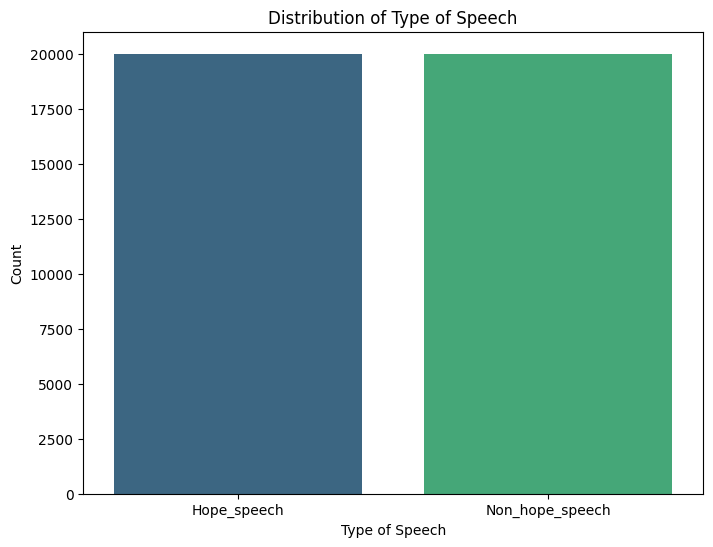

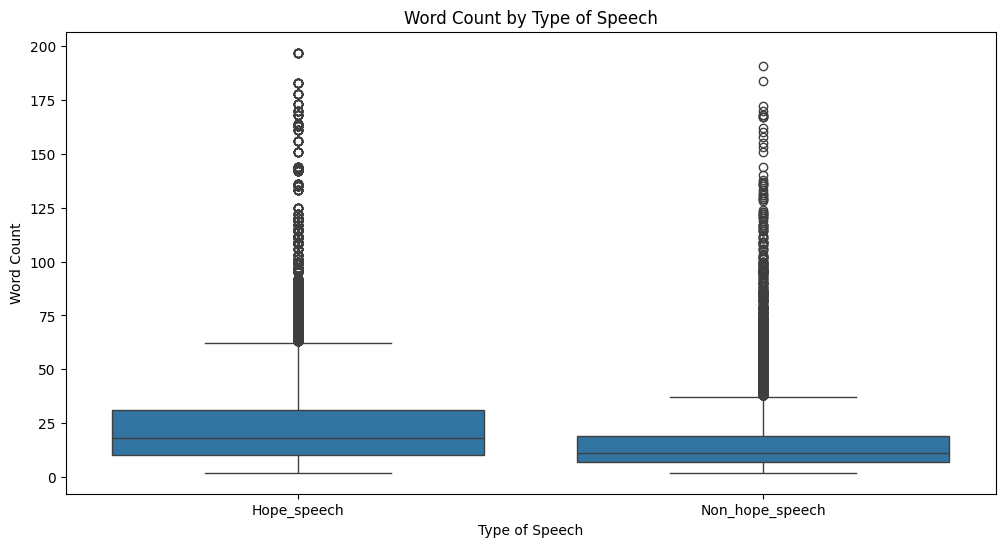

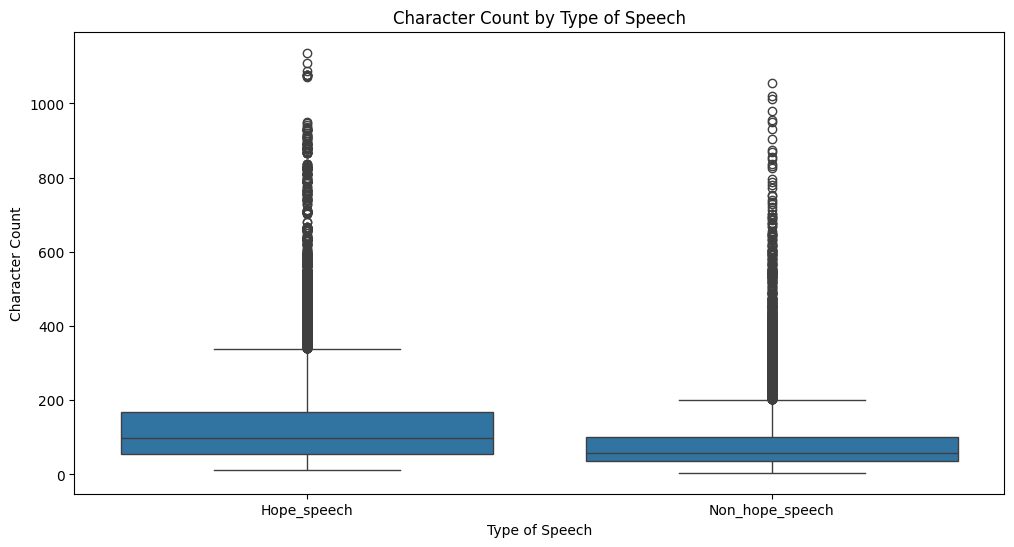

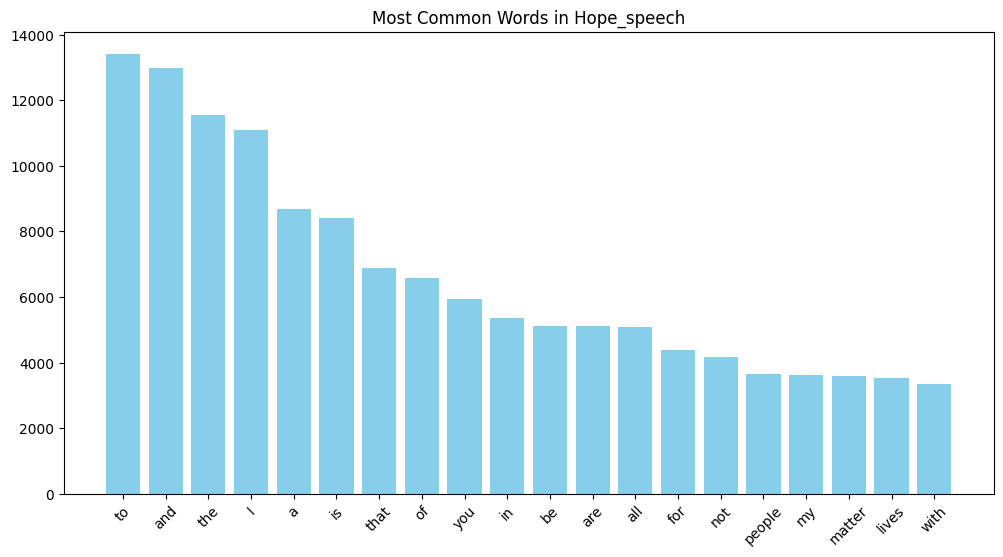

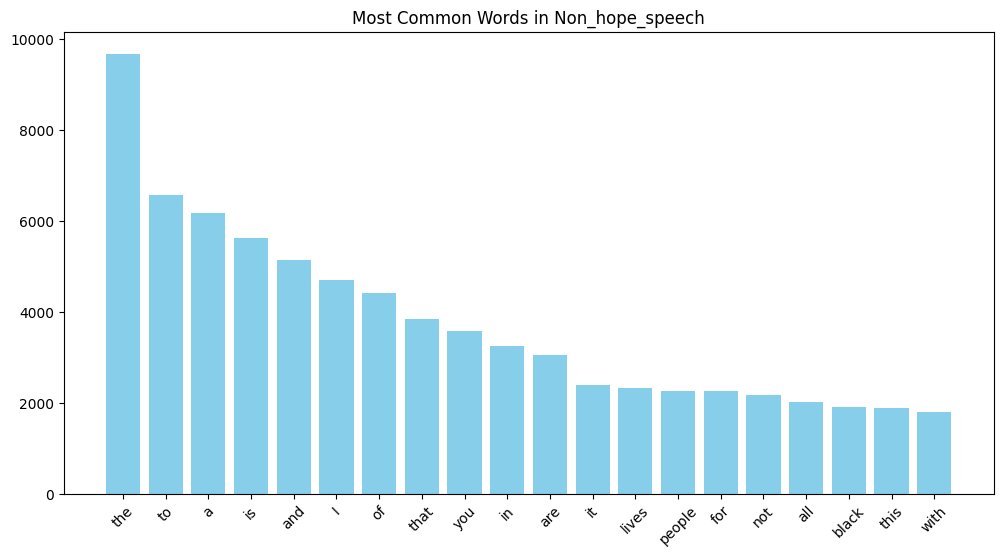

<ipython-input-13-4f17e7a75e96>:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type_of_speech', y='sentiment', palette="coolwarm")


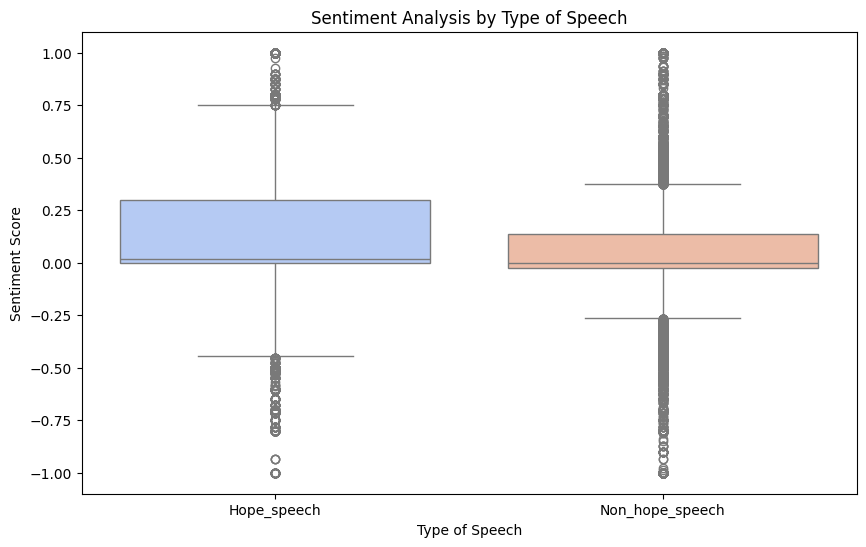

<ipython-input-13-4f17e7a75e96>:76: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type_of_speech', y='readability_score', palette="Set2")


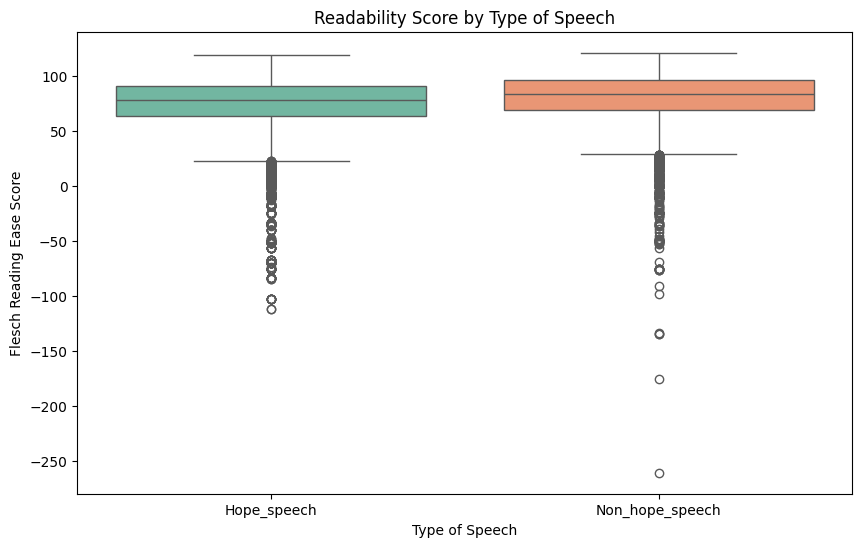

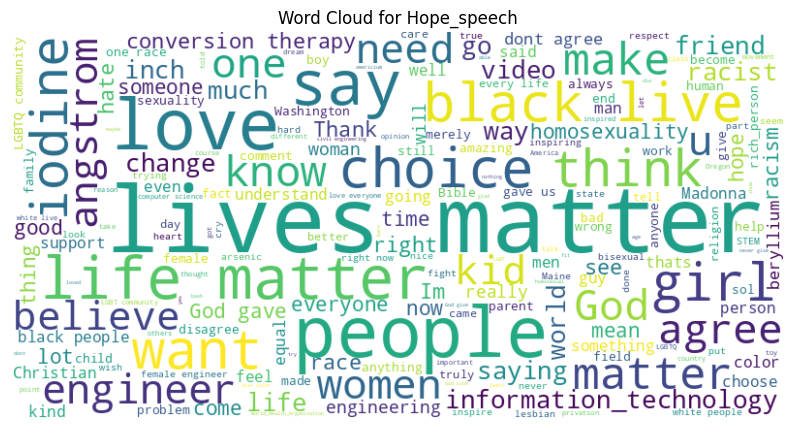

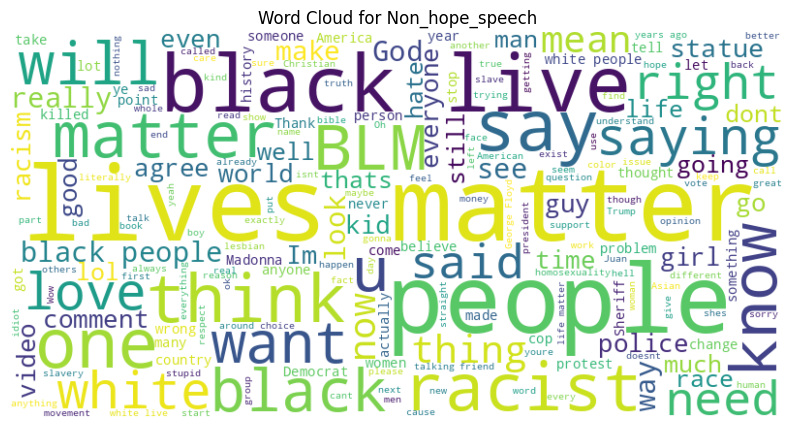

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
from textblob import TextBlob
import nltk

# Load the dataset
file_path = '/content/final_precisely_balanced_english_data.csv'
df = pd.read_csv(file_path)

# Basic structure and summary
print("Dataset Shape:", df.shape)
print("\nDataset Info:")
print(df.info())
print("\nFirst Few Rows:")
print(df.head())

# Ensure necessary columns for analysis
df['word_count'] = df['sentence'].str.split().str.len()
df['char_count'] = df['sentence'].str.len()

# 1. Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='type_of_speech', palette="viridis")
plt.title("Distribution of Type of Speech")
plt.xlabel("Type of Speech")
plt.ylabel("Count")
plt.show()

# 2. Sentence Length Analysis (Word Count and Character Count) by Class
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='type_of_speech', y='word_count')
plt.title("Word Count by Type of Speech")
plt.xlabel("Type of Speech")
plt.ylabel("Word Count")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='type_of_speech', y='char_count')
plt.title("Character Count by Type of Speech")
plt.xlabel("Type of Speech")
plt.ylabel("Character Count")
plt.show()

# 3. Most Common Words by Class
def plot_most_common_words(data, type_of_speech, n=20):
    text = " ".join(data[data['type_of_speech'] == type_of_speech]['sentence'])
    word_counts = Counter(text.split())
    common_words = dict(word_counts.most_common(n))

    plt.figure(figsize=(12, 6))
    plt.bar(common_words.keys(), common_words.values(), color='skyblue')
    plt.title(f"Most Common Words in {type_of_speech}")
    plt.xticks(rotation=45)
    plt.show()

plot_most_common_words(df, 'Hope_speech')
plot_most_common_words(df, 'Non_hope_speech')

# 4. Sentiment Analysis by Class
df['sentiment'] = df['sentence'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='type_of_speech', y='sentiment', palette="coolwarm")
plt.title("Sentiment Analysis by Type of Speech")
plt.xlabel("Type of Speech")
plt.ylabel("Sentiment Score")
plt.show()

# 5. Readability Scores by Class (if nltk and textstat installed)
try:
    from textstat import flesch_reading_ease
    df['readability_score'] = df['sentence'].apply(flesch_reading_ease)
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='type_of_speech', y='readability_score', palette="Set2")
    plt.title("Readability Score by Type of Speech")
    plt.xlabel("Type of Speech")
    plt.ylabel("Flesch Reading Ease Score")
    plt.show()
except ImportError:
    print("Textstat library is not installed; skipping readability analysis.")

# 6. Word Cloud for Each Class
def plot_wordcloud(data, type_of_speech):
    text = " ".join(data[data['type_of_speech'] == type_of_speech]['sentence'])
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud for {type_of_speech}")
    plt.show()

plot_wordcloud(df, 'Hope_speech')
plot_wordcloud(df, 'Non_hope_speech')


In [ ]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

<ipython-input-15-4d25eb8367b7>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type_of_speech', palette="viridis")


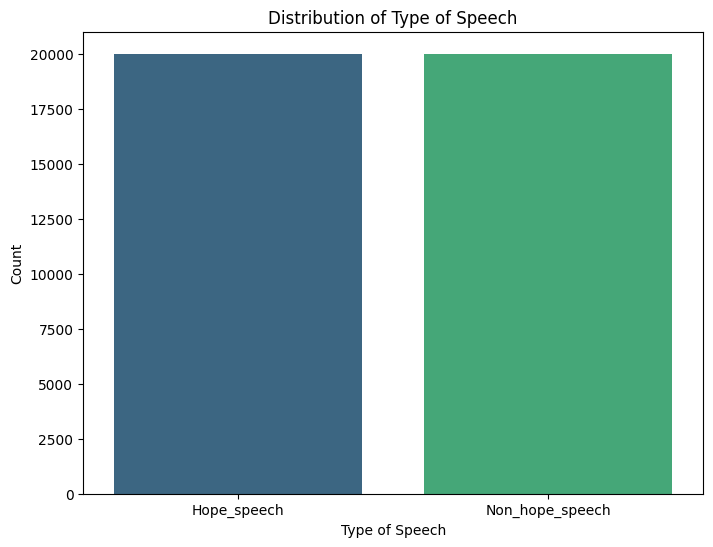

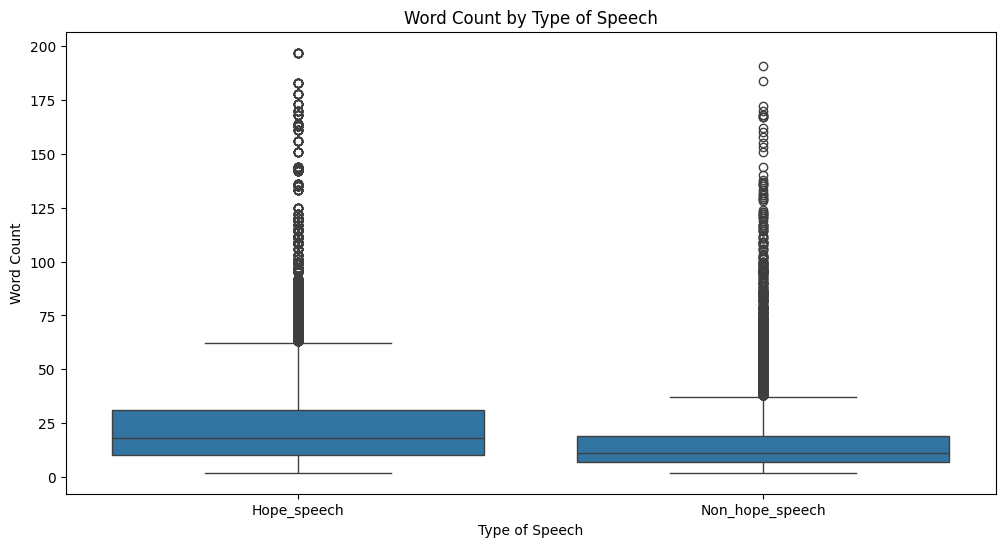

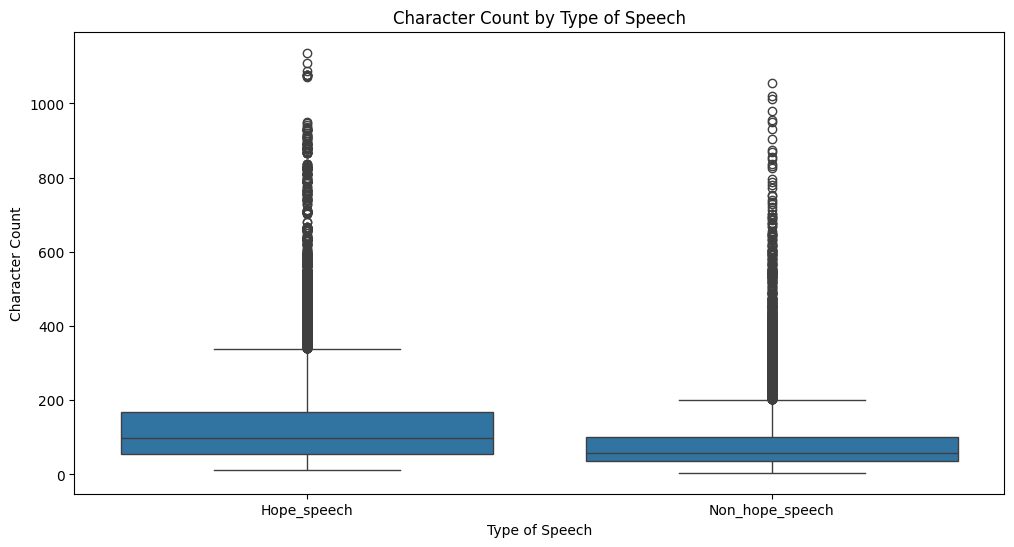

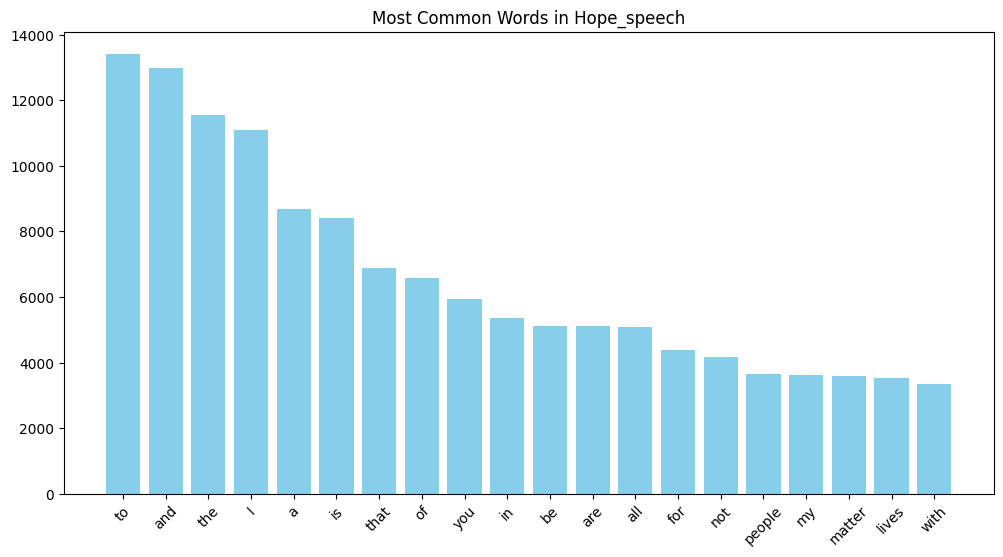

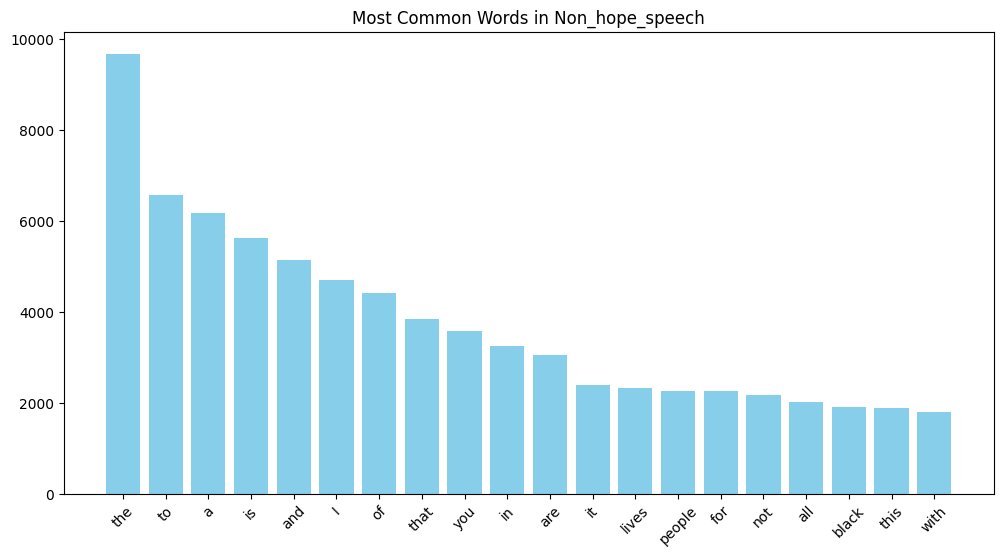

<ipython-input-15-4d25eb8367b7>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type_of_speech', y='sentiment', palette="coolwarm")


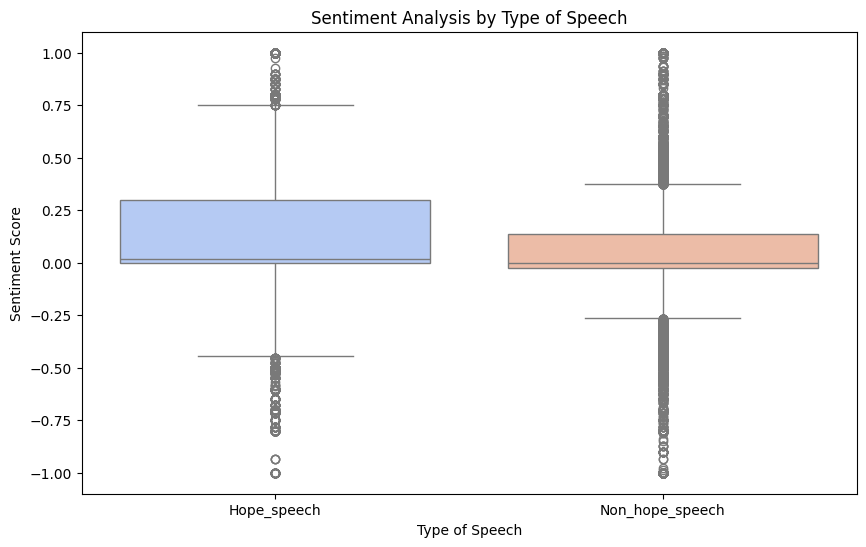

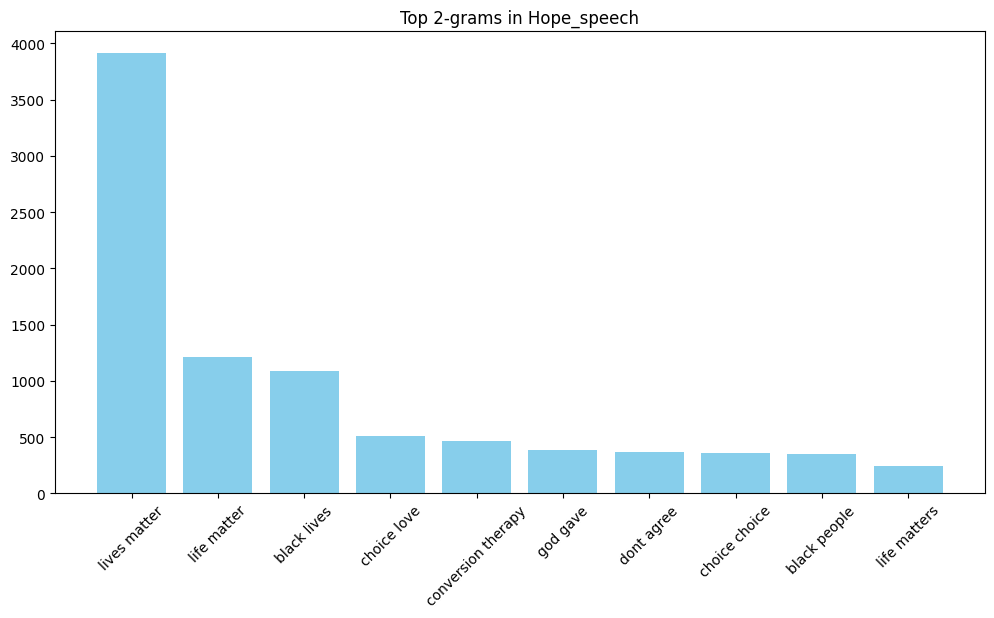

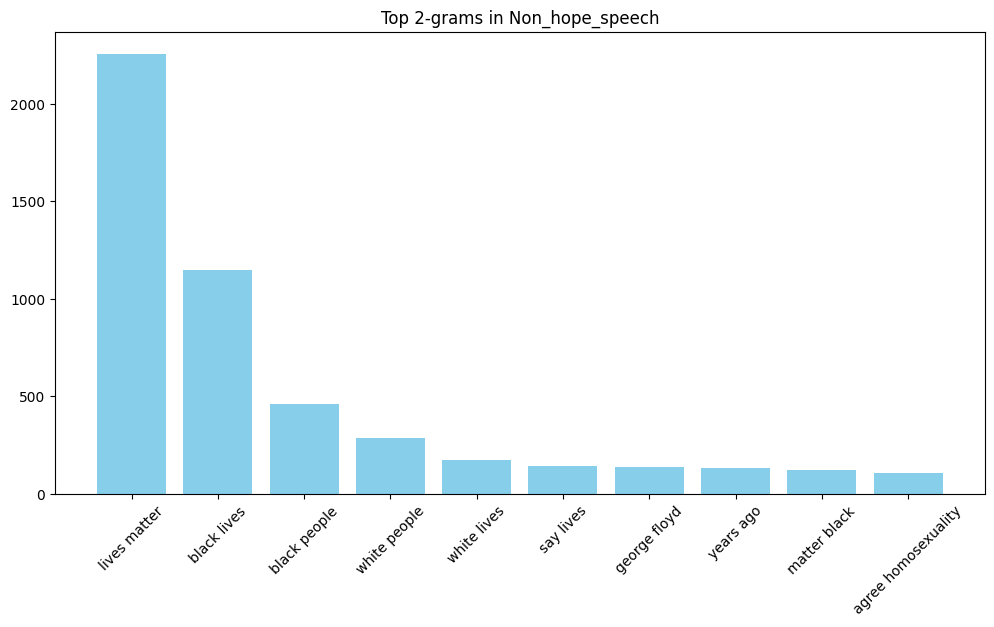

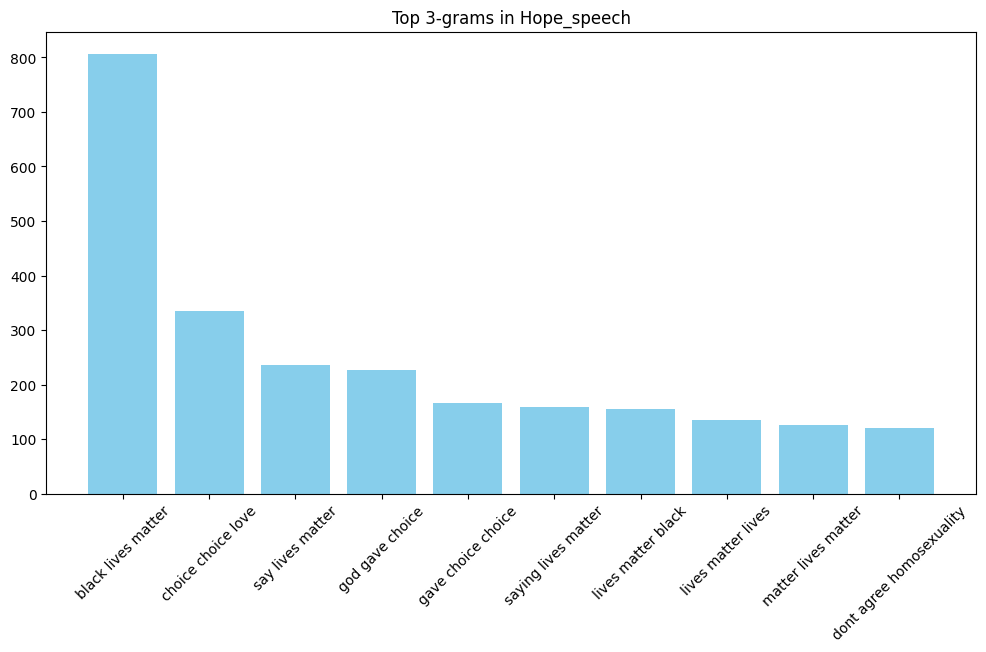

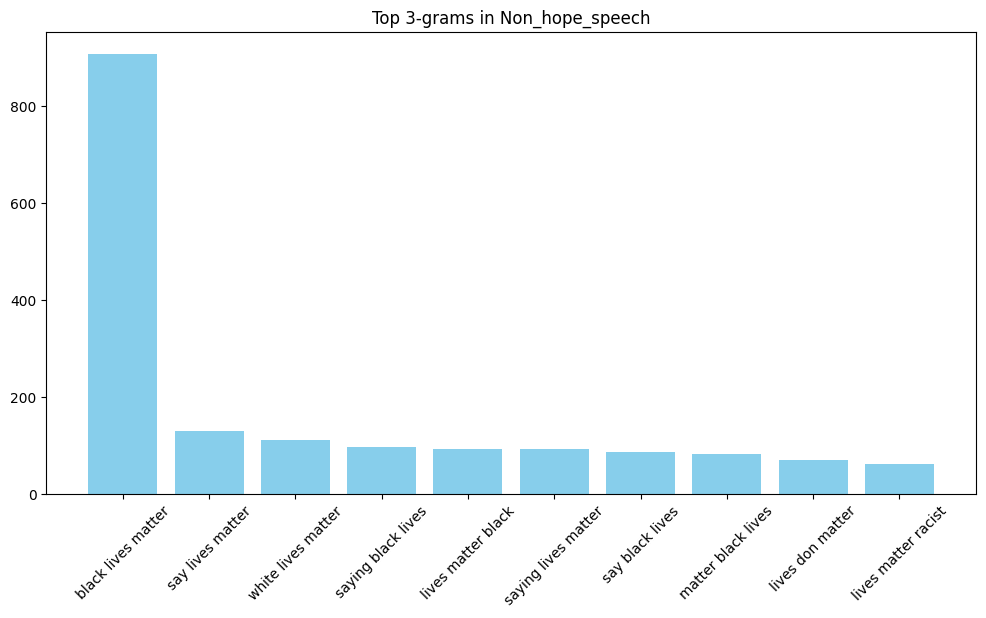

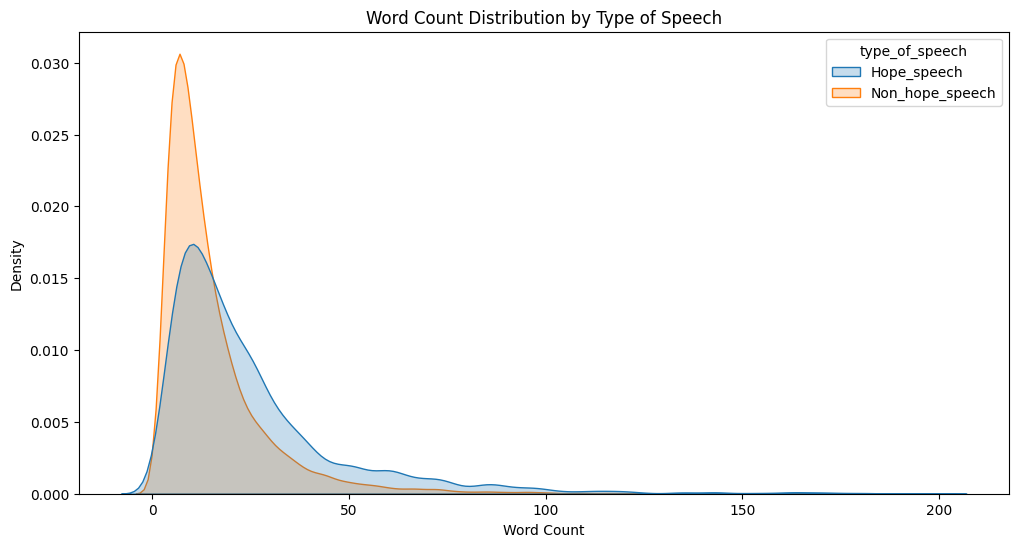

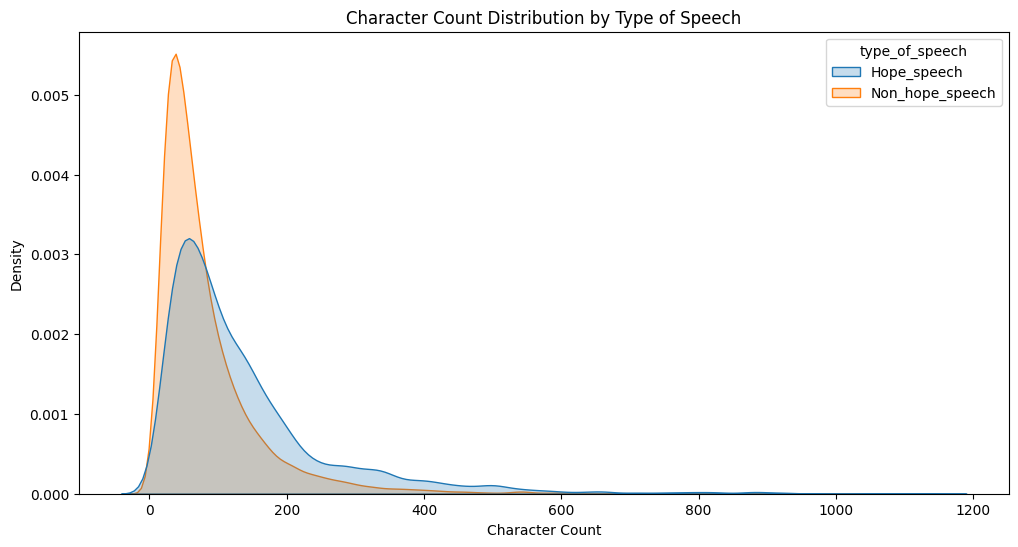

<ipython-input-15-4d25eb8367b7>:99: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=df, x='word_count', y='sentiment', hue='type_of_speech', estimator='mean', ci=None, legend=False)


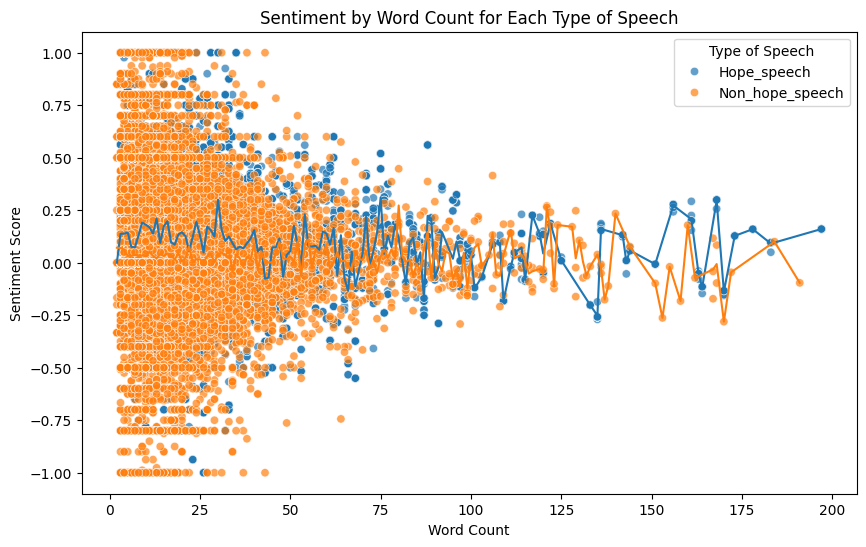

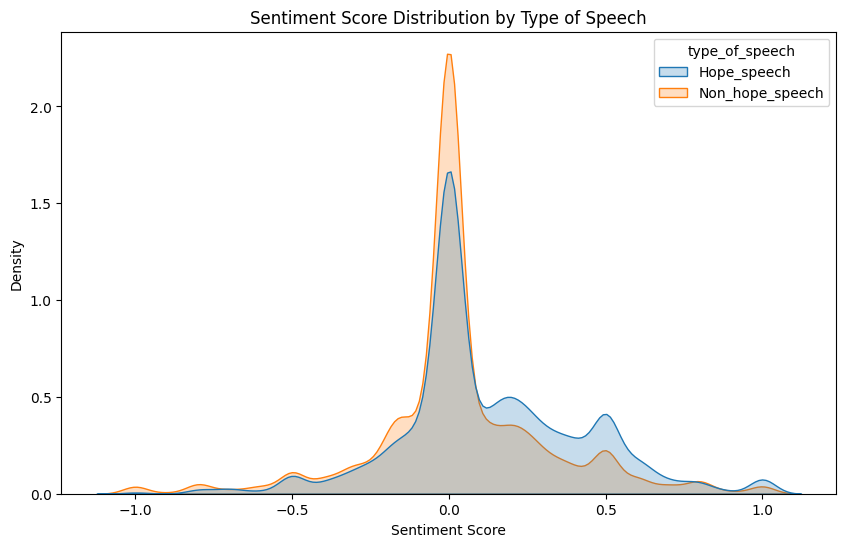

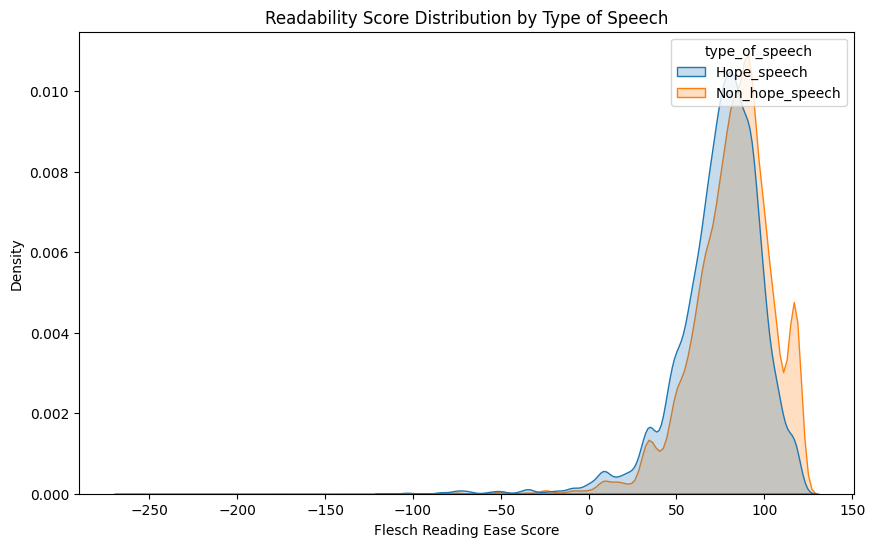

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob

# Load the dataset
file_path = '/content/final_precisely_balanced_english_data.csv'
df = pd.read_csv(file_path)

# Ensure necessary columns for analysis
df['word_count'] = df['sentence'].str.split().str.len()
df['char_count'] = df['sentence'].str.len()

# 1. Class Distribution
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='type_of_speech', palette="viridis")
plt.title("Distribution of Type of Speech")
plt.xlabel("Type of Speech")
plt.ylabel("Count")
plt.show()

# 2. Sentence Length Analysis (Word Count and Character Count) by Class
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='type_of_speech', y='word_count')
plt.title("Word Count by Type of Speech")
plt.xlabel("Type of Speech")
plt.ylabel("Word Count")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='type_of_speech', y='char_count')
plt.title("Character Count by Type of Speech")
plt.xlabel("Type of Speech")
plt.ylabel("Character Count")
plt.show()

# 3. Most Common Words by Class
def plot_most_common_words(data, type_of_speech, n=20):
    text = " ".join(data[data['type_of_speech'] == type_of_speech]['sentence'])
    word_counts = Counter(text.split())
    common_words = dict(word_counts.most_common(n))

    plt.figure(figsize=(12, 6))
    plt.bar(common_words.keys(), common_words.values(), color='skyblue')
    plt.title(f"Most Common Words in {type_of_speech}")
    plt.xticks(rotation=45)
    plt.show()

plot_most_common_words(df, 'Hope_speech')
plot_most_common_words(df, 'Non_hope_speech')

# 4. Sentiment Analysis by Class
df['sentiment'] = df['sentence'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='type_of_speech', y='sentiment', palette="coolwarm")
plt.title("Sentiment Analysis by Type of Speech")
plt.xlabel("Type of Speech")
plt.ylabel("Sentiment Score")
plt.show()

# 5. Bigrams and Trigrams Analysis by Class
def plot_ngrams(data, type_of_speech, ngram_range=(2, 2), top_n=10):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    ngrams = vectorizer.fit_transform(data[data['type_of_speech'] == type_of_speech]['sentence'])
    ngram_counts = Counter(dict(zip(vectorizer.get_feature_names_out(), ngrams.sum(axis=0).A1)))
    top_ngrams = dict(ngram_counts.most_common(top_n))

    plt.figure(figsize=(12, 6))
    plt.bar(top_ngrams.keys(), top_ngrams.values(), color='skyblue')
    plt.title(f"Top {ngram_range[1]}-grams in {type_of_speech}")
    plt.xticks(rotation=45)
    plt.show()

plot_ngrams(df, 'Hope_speech', (2, 2))  # Bigrams for Hope_speech
plot_ngrams(df, 'Non_hope_speech', (2, 2))  # Bigrams for Non_hope_speech
plot_ngrams(df, 'Hope_speech', (3, 3))  # Trigrams for Hope_speech
plot_ngrams(df, 'Non_hope_speech', (3, 3))  # Trigrams for Non_hope_speech

# 6. Word and Character Count Distribution by Class
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='word_count', hue='type_of_speech', fill=True)
plt.title("Word Count Distribution by Type of Speech")
plt.xlabel("Word Count")
plt.ylabel("Density")
plt.show()

plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='char_count', hue='type_of_speech', fill=True)
plt.title("Character Count Distribution by Type of Speech")
plt.xlabel("Character Count")
plt.ylabel("Density")
plt.show()

# 7. Average Sentiment by Word Count
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='word_count', y='sentiment', hue='type_of_speech', alpha=0.7)
sns.lineplot(data=df, x='word_count', y='sentiment', hue='type_of_speech', estimator='mean', ci=None, legend=False)
plt.title("Sentiment by Word Count for Each Type of Speech")
plt.xlabel("Word Count")
plt.ylabel("Sentiment Score")
plt.legend(title="Type of Speech")
plt.show()

# 8. Sentiment Score Distribution by Class
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='sentiment', hue='type_of_speech', fill=True)
plt.title("Sentiment Score Distribution by Type of Speech")
plt.xlabel("Sentiment Score")
plt.ylabel("Density")
plt.show()

# 9. Readability Score Distribution by Class (if readability scores are calculated)
try:
    from textstat import flesch_reading_ease
    df['readability_score'] = df['sentence'].apply(flesch_reading_ease)
    plt.figure(figsize=(10, 6))
    sns.kdeplot(data=df, x='readability_score', hue='type_of_speech', fill=True)
    plt.title("Readability Score Distribution by Type of Speech")
    plt.xlabel("Flesch Reading Ease Score")
    plt.ylabel("Density")
    plt.show()
except ImportError:
    print("Textstat library is not installed; skipping readability analysis.")


<ipython-input-16-fff95d1d1647>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  numerical_df['readability_score'] = df['readability_score']


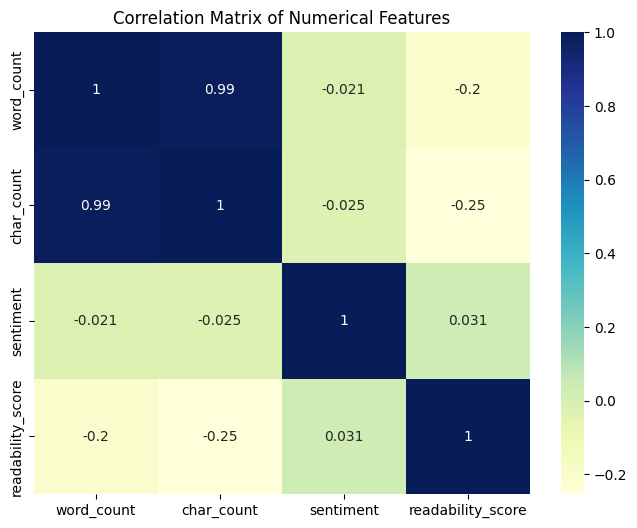

<ipython-input-16-fff95d1d1647>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='type_of_speech', y='avg_word_length', palette="pastel")


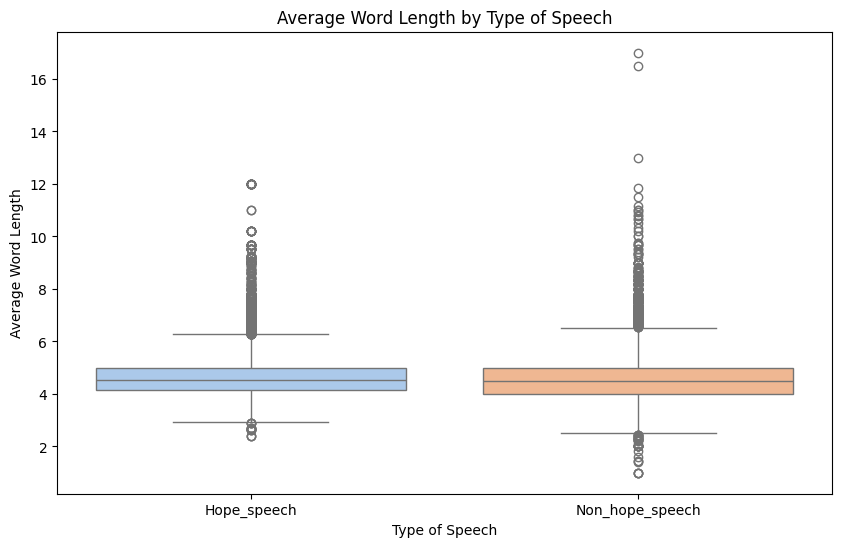

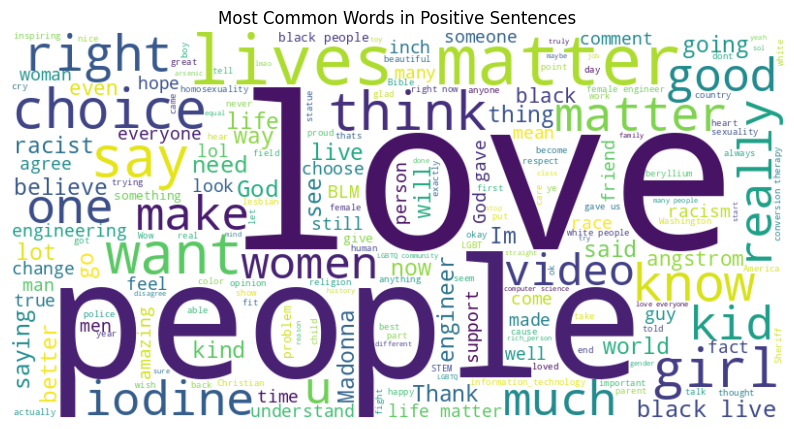

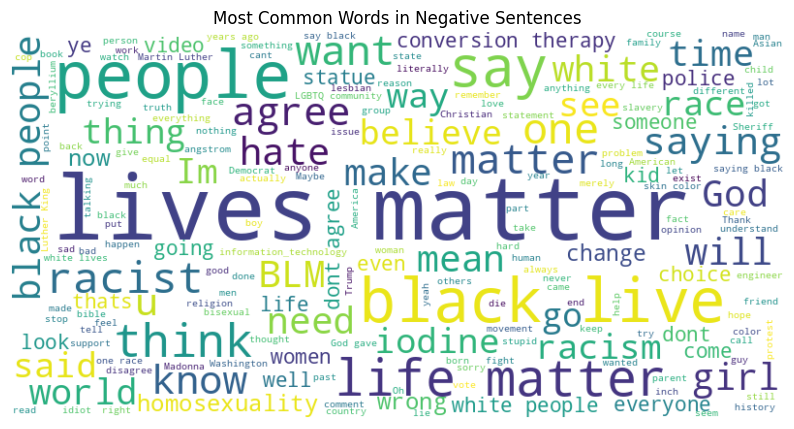

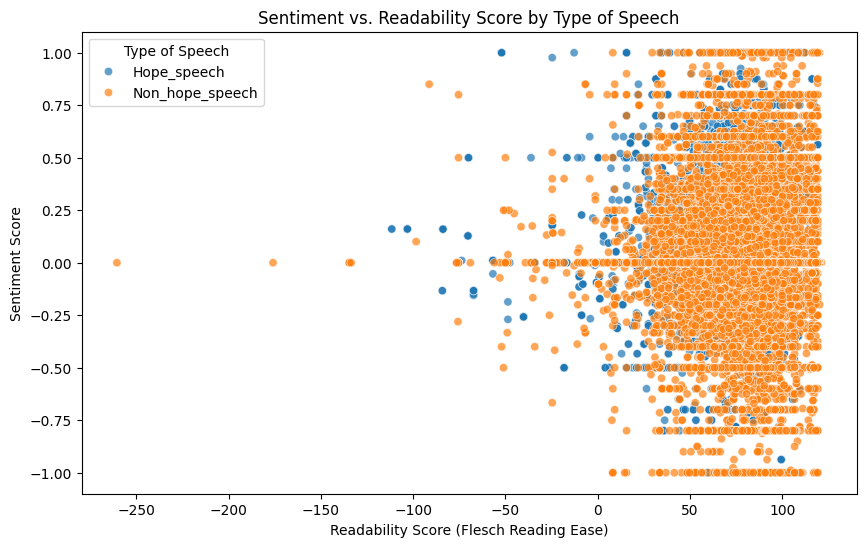

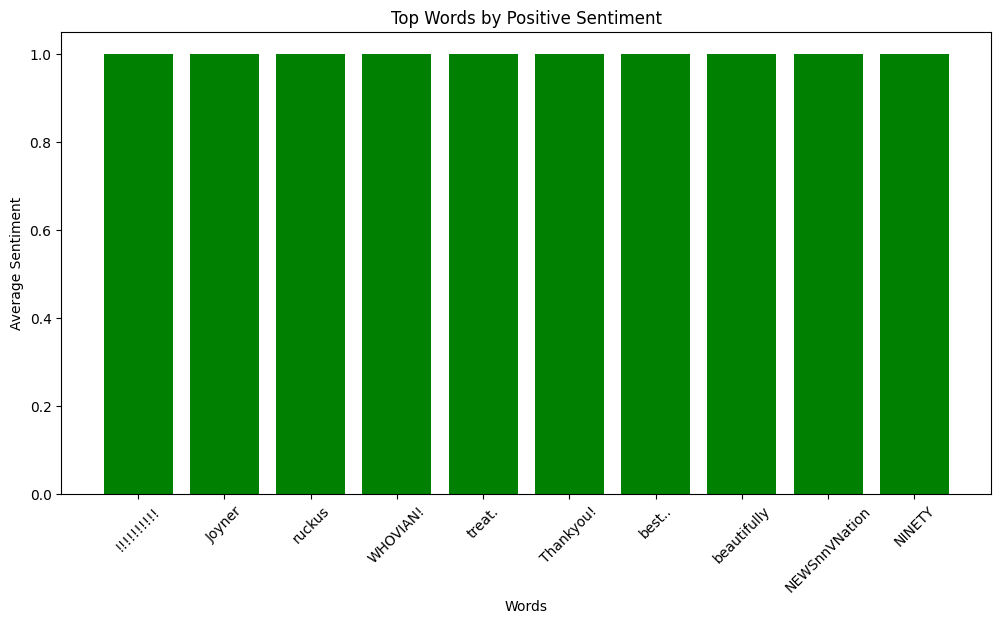

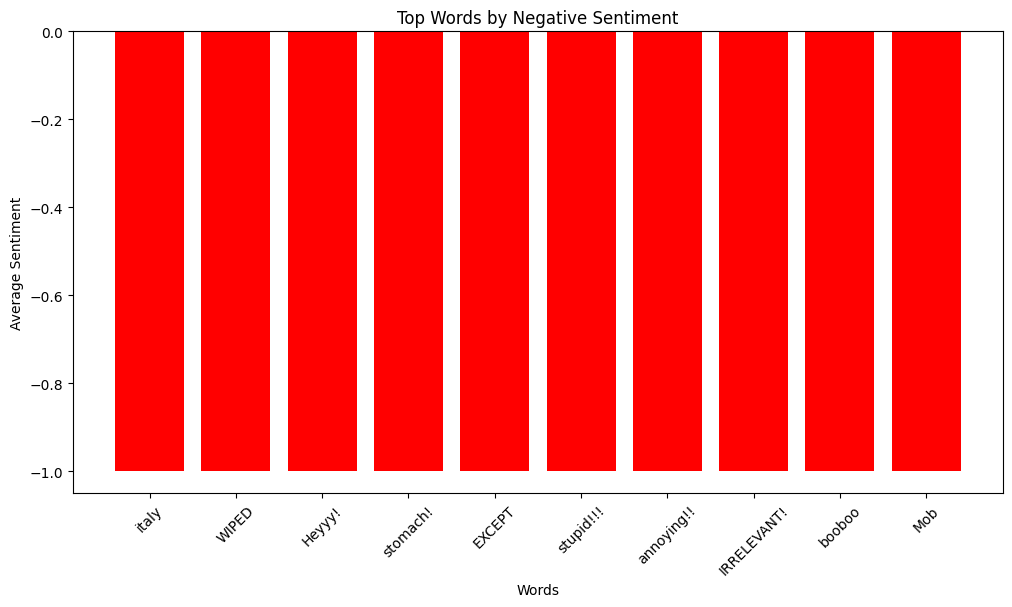

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import numpy as np

# 1. Correlation Matrix for Numerical Features
numerical_df = df[['word_count', 'char_count', 'sentiment']]
if 'readability_score' in df.columns:
    numerical_df['readability_score'] = df['readability_score']

plt.figure(figsize=(8, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap="YlGnBu")
plt.title("Correlation Matrix of Numerical Features")
plt.show()

# 2. Average Word Length by Class
df['avg_word_length'] = df['sentence'].apply(lambda x: np.mean([len(word) for word in x.split()]))
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='type_of_speech', y='avg_word_length', palette="pastel")
plt.title("Average Word Length by Type of Speech")
plt.xlabel("Type of Speech")
plt.ylabel("Average Word Length")
plt.show()

# 3. Most Common Words by Sentiment (positive vs. negative)
positive_text = " ".join(df[df['sentiment'] > 0]['sentence'])
negative_text = " ".join(df[df['sentiment'] <= 0]['sentence'])

# Word Cloud for Positive Sentences
positive_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(positive_text)
plt.figure(figsize=(10, 6))
plt.imshow(positive_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Positive Sentences")
plt.show()

# Word Cloud for Negative Sentences
negative_wordcloud = WordCloud(width=800, height=400, background_color="white").generate(negative_text)
plt.figure(figsize=(10, 6))
plt.imshow(negative_wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Most Common Words in Negative Sentences")
plt.show()

# 4. Sentiment vs. Readability Score (if readability is available)
if 'readability_score' in df.columns:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='readability_score', y='sentiment', hue='type_of_speech', alpha=0.7)
    plt.title("Sentiment vs. Readability Score by Type of Speech")
    plt.xlabel("Readability Score (Flesch Reading Ease)")
    plt.ylabel("Sentiment Score")
    plt.legend(title="Type of Speech")
    plt.show()

# 5. Top Words by Average Sentiment
all_words = df['sentence'].str.split().explode()
word_sentiments = df[['sentence', 'sentiment']].copy()
word_sentiments['words'] = word_sentiments['sentence'].str.split()
word_sentiments = word_sentiments.explode('words')
average_sentiment_per_word = word_sentiments.groupby('words')['sentiment'].mean().sort_values()

# Plot top positive and negative words
top_positive_words = average_sentiment_per_word[-10:]
top_negative_words = average_sentiment_per_word[:10]

plt.figure(figsize=(12, 6))
plt.bar(top_positive_words.index, top_positive_words.values, color='green')
plt.title("Top Words by Positive Sentiment")
plt.xlabel("Words")
plt.ylabel("Average Sentiment")
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(top_negative_words.index, top_negative_words.values, color='red')
plt.title("Top Words by Negative Sentiment")
plt.xlabel("Words")
plt.ylabel("Average Sentiment")
plt.xticks(rotation=45)
plt.show()


In [ ]:
!pip uninstall -y nltk
!pip install nltk


Found existing installation: nltk 3.9.1
Uninstalling nltk-3.9.1:
  Successfully uninstalled nltk-3.9.1
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 59.9 MB/s eta 0:00:00


In [ ]:
import nltk
nltk.data.path.append('/content/nltk_data')  # Add custom directory to NLTK path
#/content/modified_english_data.csv
# Download specific resources to this directory
nltk.download('punkt', download_dir='/content/nltk_data')
nltk.download('stopwords', download_dir='/content/nltk_data')


[nltk_data] Downloading package punkt to /content/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /content/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
nltk.data.path.append('/content/nltk_data')


In [ ]:
import nltk
print(nltk.find('tokenizers/punkt'))
print(nltk.find('corpora/stopwords'))


/root/nltk_data/tokenizers/punkt
/content/nltk_data/corpora/stopwords


In [ ]:
# Install spaCy and download the English model
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 22.6 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [ ]:
import pandas as pd
import spacy
import numpy as np

# Load spaCy's English language model
nlp = spacy.load("en_core_web_sm")

# Load the dataset
file_path = '/content/final_precisely_balanced_english_data.csv'
df = pd.read_csv(file_path)

# Preprocessing function using spaCy
def preprocess_text(text):
    # Process the text with spaCy
    doc = nlp(text.lower())  # Lowercasing
    # Remove stopwords and punctuation
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
    return tokens

# Apply preprocessing to each sentence
df['processed_text'] = df['sentence'].apply(preprocess_text)

# Load GloVe embeddings (assuming glove.6B.100d.txt has been downloaded and placed in the same folder)
glove_file_path = '/content/glove.6B.100d.txt'  # Replace with your actual GloVe path
embedding_dim = 100
embedding_index = {}

with open(glove_file_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.array(values[1:], dtype='float32')
        embedding_index[word] = vector

# Function to convert sentence to feature vector using GloVe embeddings
def sentence_to_vector(sentence, embedding_index, embedding_dim):
    vector = np.zeros(embedding_dim)
    n_words = 0

    for word in sentence:
        if word in embedding_index:
            vector += embedding_index[word]
            n_words += 1

    if n_words > 0:
        vector /= n_words
    return vector

# Apply feature extraction
df['feature_vector'] = df['processed_text'].apply(lambda x: sentence_to_vector(x, embedding_index, embedding_dim))

# Encode labels
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['label'] = label_encoder.fit_transform(df['type_of_speech'])

# Split features and labels
X = np.stack(df['feature_vector'].values)
y = df['label'].values

# Optionally split into train and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data preprocessing and feature extraction completed.")
print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Data preprocessing and feature extraction completed.
Training data shape: (32000, 100)
Testing data shape: (8000, 100)


In [ ]:
import pandas as pd

# Load the dataset to check its shape
file_path = '/content/final_precisely_balanced_english_data.csv'
df = pd.read_csv(file_path)

# Get the shape of the dataset
df_shape = df.shape
df_shape


(40000, 2)

In [ ]:
# Load spaCy's English language model
import spacy
nlp = spacy.load("en_core_web_sm")

# Preprocessing function using spaCy
def preprocess_text(text):
    # Process the text with spaCy
    doc = nlp(text.lower())  # Lowercasing
    # Remove stopwords and punctuation
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]
    return tokens

# Apply preprocessing to each sentence
df['processed_text'] = df['sentence'].apply(preprocess_text)

# Check if the processed_text column is now in the DataFrame
print("Columns in DataFrame after preprocessing:")
print(df.columns)


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Columns in DataFrame after preprocessing:
Index(['sentence', 'type_of_speech', 'processed_text'], dtype='object')


In [ ]:
import numpy as np

# Load GloVe embeddings
glove_file_path = '/content/glove.6B.100d.txt'  # Replace with your actual GloVe path
embedding_dim = 100
embedding_index = {}

with open(glove_file_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.array(values[1:], dtype='float32')
        embedding_index[word] = vector

# Function to convert sentence to feature vector using GloVe embeddings
def sentence_to_vector(sentence, embedding_index, embedding_dim):
    vector = np.zeros(embedding_dim)
    n_words = 0

    for word in sentence:
        if word in embedding_index:
            vector += embedding_index[word]
            n_words += 1

    if n_words > 0:
        vector /= n_words
    return vector

# Apply feature extraction to create the feature_vector column
df['feature_vector'] = df['processed_text'].apply(lambda x: sentence_to_vector(x, embedding_index, embedding_dim))

# Check if the feature_vector column is now in the DataFrame
print("Columns in DataFrame after feature extraction:")
print(df.columns)


Columns in DataFrame after feature extraction:
Index(['sentence', 'type_of_speech', 'processed_text', 'feature_vector'], dtype='object')


In [ ]:
import pandas as pd
import numpy as np
import spacy

# Step 1: Load Dataset
file_path = '/content/final_precisely_balanced_english_data.csv'  # Update the path to your dataset
df = pd.read_csv(file_path)

# Step 2: Load spaCy for Preprocessing
nlp = spacy.load("en_core_web_sm")

# Preprocessing function
def preprocess_text(text):
    doc = nlp(text.lower())  # Lowercase the text
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]  # Remove stopwords and punctuation
    return tokens

# Apply preprocessing to the 'sentence' column
if 'sentence' in df.columns:
    df['processed_text'] = df['sentence'].apply(preprocess_text)
    print("Preprocessing complete. 'processed_text' column added.")
else:
    print("The 'sentence' column is missing. Please ensure your dataset has this column.")

# Step 3: Load GloVe Embeddings
glove_file_path = '/content/glove.6B.100d.txt'  # Update with the path to your GloVe file
embedding_dim = 100
embedding_index = {}

with open(glove_file_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.array(values[1:], dtype='float32')
        embedding_index[word] = vector

print(f"Loaded {len(embedding_index)} word vectors.")

# Step 4: Extract GloVe Feature Vectors
def sentence_to_vector(sentence, embedding_index, embedding_dim=100):
    vector = np.zeros(embedding_dim)
    n_words = 0
    for word in sentence:
        if word in embedding_index:
            vector += embedding_index[word]
            n_words += 1
    if n_words > 0:
        vector /= n_words
    return vector

# Apply feature extraction
if 'processed_text' in df.columns:
    df['feature_vector'] = df['processed_text'].apply(lambda x: sentence_to_vector(x, embedding_index) if isinstance(x, list) else np.zeros(embedding_dim))
    print("Feature extraction complete. 'feature_vector' column added.")
else:
    print("The 'processed_text' column is missing. Ensure preprocessing was successful.")

# Step 5: Save the Dataset
save_path = '/content/dataset_with_feature_vector.csv'
df.to_csv(save_path, index=False)
print(f"Dataset with feature vectors saved to: {save_path}")

# Optional: Display the first few rows of the dataset for verification
print(df.head())


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Preprocessing complete. 'processed_text' column added.
Loaded 100037 word vectors.
Feature extraction complete. 'feature_vector' column added.
Dataset with feature vectors saved to: /content/dataset_with_feature_vector.csv
                                            sentence type_of_speech  \
0  We are all of the Lapp race ... the human race...    Hope_speech   
1                      She save life with her music.    Hope_speech   
2                  littlemermaid all the best Sis...    Hope_speech   
3  All lives are what you make of them. nWe are a...    Hope_speech   
4  mollie Rebecca Im heterosexual. Saying I dont ...    Hope_speech   

                                      processed_text  \
0                          [lapp, race, human, race]   
1                                [save, life, music]   
2                         [littlemermaid, best, sis]   
3                         [lives,  , nwe, born, die]   
4  [mollie, rebecca, m, heterosexual, saying, nt,...   

             

In [ ]:
# Load the saved dataset to check its structure
saved_file_path = '/content/dataset_with_feature_vector.csv'
df_loaded = pd.read_csv(saved_file_path)

# Display dataset structure
rows, columns = df_loaded.shape
df_loaded_info = df_loaded.info()

# Display a few rows for inspection
df_loaded_head = df_loaded.head()

(rows, columns), df_loaded_info, df_loaded_head


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   sentence        40000 non-null  object
 1   type_of_speech  40000 non-null  object
 2   processed_text  40000 non-null  object
 3   feature_vector  40000 non-null  object
dtypes: object(4)
memory usage: 1.2+ MB


((40000, 4),
 None,
                                             sentence type_of_speech  \
 0  We are all of the Lapp race ... the human race...    Hope_speech   
 1                      She save life with her music.    Hope_speech   
 2                  littlemermaid all the best Sis...    Hope_speech   
 3  All lives are what you make of them. nWe are a...    Hope_speech   
 4  mollie Rebecca Im heterosexual. Saying I dont ...    Hope_speech   
 
                                       processed_text  \
 0                  ['lapp', 'race', 'human', 'race']   
 1                          ['save', 'life', 'music']   
 2                   ['littlemermaid', 'best', 'sis']   
 3            ['lives', '\xa0', 'nwe', 'born', 'die']   
 4  ['mollie', 'rebecca', 'm', 'heterosexual', 'sa...   
 
                                       feature_vector  
 0  [ 3.75817496e-01  2.13408991e-01  4.54374984e-...  
 1  [ 6.07366612e-02  3.80363335e-01  2.60286669e-...  
 2  [-0.01054     0.039055    0.72

In [ ]:
import pandas as pd
import numpy as np
import spacy
import ast

# Step 1: Load the Dataset
file_path = '/content/dataset_with_feature_vector.csv'  # Update to the correct path of your dataset
df = pd.read_csv(file_path)

# Step 2: Load spaCy for Text Preprocessing
nlp = spacy.load("en_core_web_sm")

# Preprocessing function using spaCy
def preprocess_text(text):
    doc = nlp(text.lower())  # Lowercase the text
    tokens = [token.text for token in doc if not token.is_stop and not token.is_punct]  # Remove stopwords and punctuation
    return tokens

# Apply preprocessing to the 'sentence' column to create 'processed_text'
df['processed_text'] = df['sentence'].apply(preprocess_text)

# Step 3: Load GloVe Embeddings
glove_file_path = '/content/glove.6B.100d.txt'  # Update to your GloVe file path
embedding_dim = 100
embedding_index = {}

# Load GloVe embeddings
with open(glove_file_path, 'r', encoding='utf-8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        vector = np.array(values[1:], dtype='float32')
        embedding_index[word] = vector

print(f"Loaded {len(embedding_index)} word vectors from GloVe.")

# Step 4: Fix Existing Feature Vector Formatting (if necessary)
def fix_feature_vector(vector_str):
    try:
        # Replace spaces with commas and convert string to list
        fixed_str = vector_str.replace(' ', ',')
        return np.array(ast.literal_eval(fixed_str))
    except Exception as e:
        print(f"Error processing vector: {vector_str}, Error: {e}")
        return np.zeros(embedding_dim)  # Fallback to a zero vector

# Step 5: Regenerate or Fix Feature Vectors
def sentence_to_vector(sentence, embedding_index, embedding_dim=100):
    vector = np.zeros(embedding_dim)
    n_words = 0
    for word in sentence:
        if word in embedding_index:
            vector += embedding_index[word]
            n_words += 1
    if n_words > 0:
        vector /= n_words  # Average the word vectors
    return vector

# Apply the fix or regenerate feature vectors
if 'feature_vector' in df.columns:
    # Fix the existing feature_vector column
    df['feature_vector'] = df['feature_vector'].apply(fix_feature_vector)
else:
    # Regenerate feature_vector column if it doesn't exist
    df['feature_vector'] = df['processed_text'].apply(lambda x: sentence_to_vector(x, embedding_index))

# Step 6: Save the Processed Dataset
save_path = '/content/processed_dataset_with_fixed_feature_vector.csv'
df.to_csv(save_path, index=False)
print(f"Processed dataset saved successfully to {save_path}")

# Step 7: Verify the Saved Dataset
df_saved = pd.read_csv(save_path)
print("First 5 rows of the saved dataset:")
print(df_saved.head())


/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


Streaming output truncated to the last 5000 lines.
  0.07427437 -0.19545524 -0.06472049  0.16152417 -0.0608485   0.01609687
 -0.6140775   0.158238    0.14937625  0.08125863 -0.35279125  0.05085362
 -1.3251925  -0.20522613 -0.26103875 -0.32193749 -0.14174325 -0.31513
  0.06173788 -0.01525125  0.25087387 -0.02459225 -0.11383287 -0.20578888
 -0.36122088 -0.43899     0.50901713  0.24144075], Error: invalid syntax (<unknown>, line 1)
Error processing vector: [-0.09307399  0.24702251  0.24172251 -0.11062001 -0.16032749  0.18796076
 -0.33247199 -0.12542     0.116617    0.21436    -0.33155476  0.24754749
 -0.2223325   0.088322   -0.03672249  0.2229425   0.00273275 -0.0044775
 -0.36343999  0.10581874  0.37721001 -0.22587275  0.28495    -0.317113
  0.271377   -0.330365   -0.26730251 -0.16924     0.23689925 -0.424915
 -0.05778342  0.01067999 -0.2514675  -0.04508001 -0.04091075 -0.05116875
 -0.16229274 -0.34701825  0.242332    0.2352525  -0.41196076 -0.153382
  0.18073252 -0.23007945 -0.683325    